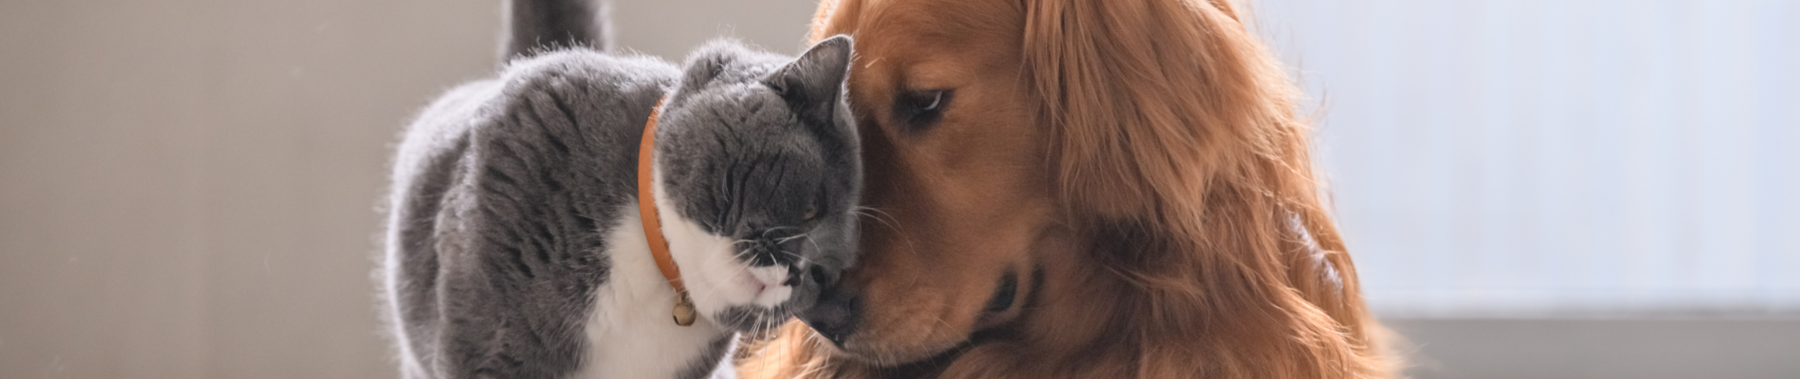

En este *notebook* vamos a examinar los datos que procesamos en el [cuaderno anterior](./III.%20Limpieza%20de%20datos.ipynb) y a realizar el análisis exploratorio de los mismos para evaluar las hipótesis que planteamos en la introducción.

La estructura de este *notebook* es la siguiente:

[**1. Preprocesamiento**](#1.-Preprocesamiento)

[1.1. Importar librerías](#1.1.-Importar-librerías)

[1.2. Importar DataFrame](#1.2.-Importar-DataFrame)

[**2. Análisis Exploratorio**](#2.-Análisis-Exploratorio)

[2.1. Descripción de los datos](#2.1.-Descripción-de-los-datos)

[2.2. Definir variable objetivo](#2.2.-Definir-variable-objetivo)

[2.3. Estadística descriptiva](#2.3.-Estadística-descriptiva)

[**3. Contraste de hipótesis**](#3.-Contraste-de-hipótesis)

[3.1. Hipótesis 1](#3.1.-Hipótesis-1:-Los-gatos-negros-tienen-menores-tasas-de-adopción)

[3.2. Hipótesis 2](#3.2.-Hipótesis-2:-Los-animales-ancianos-tienen-menores-tasas-de-adopción)

[3.3. Hipótesis 3](#3.3.-Hipótesis-3:-Los-animales-de-raza-tienen-mayores-tasas-de-adopción)

[3.4. Hipótesis 4](#3.4.-Hipótesis-4:-Los-pitbulls-tienen-menores-tasas-de-adopción)

__________________________________________________________________________________________________________________

# 1. Preprocesamiento

### 1.1. Importar librerías

In [1]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
import seaborn as sns
sns.set(color_codes=True)

import datetime

# Visualización:
import plotly.express as px
import matplotlib.pyplot as plt

# Eliminamos los warnings
import warnings
warnings.filterwarnings("ignore")

__________________________________________________________________________________________________________________

### 1.2. Importar DataFrame

In [2]:
shelter_outcomes = pd.read_csv('C:/Users/dhbou/Desktop/GitHub/Mi_Repo/Projects/EDA Animal Shelter Outcomes/data/shelter_outcomes.csv', index_col = 0)

In [3]:
shelter_outcomes.head()

,animal_id,name,date_of_birth,sex,animal_type,purebred,breed_1,breed_2,color_1,color_2,date_of_intake,intake_type,intake_condition,age_upon_intake,sterilized_upon_intake,date_of_outcome,time_at_shelter,outcome_type,age_upon_outcome,sterilized_upon_outcome
0,A670057,Brownie,2012-01-01,Male,Dog,False,Chow Chow,None,Orange,None,2014-01-01 13:05:00,Stray,Normal,2,False,2014-01-05 16:50:00,4,Return to Owner,2.0,True
1,A670061,Koda,2012-01-01,Male,Dog,False,Chow Chow,None,Orange,None,2014-01-01 13:33:00,Owner Surrender,Normal,2,False,2014-01-24 13:41:00,23,Adoption,2.0,True
2,A670064,Unknown,2013-09-16,Female,Dog,False,Pit Bull,Pit Bull,Orange,None,2014-01-01 13:57:00,Stray,Normal,0,False,2014-01-03 16:33:00,2,Died,0.0,False
3,A670065,Muneca,2007-01-02,Female,Dog,False,Australian Shepherd,Chow Chow,White,Orange,2014-01-01 14:11:00,Stray,Normal,7,True,2014-01-02 11:52:00,0,Return to Owner,7.0,True
4,A668374,Princessa,2013-08-01,Female,Dog,False,Chihuahua Shorthair,None,Brown,None,2014-01-01 14:42:00,Owner Surrender,Normal,0,False,2014-01-03 18:30:00,2,Adoption,0.0,True


__________________________________________________________________________________________________________________

# 2. Análisis Exploratorio

### 2.1. Descripción de los datos

Tal y como comentamos en el anterior *notebook*, el *dataset* con el que trabajaremos en este proyecto es el siguiente:

In [4]:
shelter_outcomes

,animal_id,name,date_of_birth,sex,animal_type,purebred,breed_1,breed_2,color_1,color_2,date_of_intake,intake_type,intake_condition,age_upon_intake,sterilized_upon_intake,date_of_outcome,time_at_shelter,outcome_type,age_upon_outcome,sterilized_upon_outcome
0,A670057,Brownie,2012-01-01,Male,Dog,False,Chow Chow,None,Orange,None,2014-01-01 13:05:00,Stray,Normal,2,False,2014-01-05 16:50:00,4,Return to Owner,2.0,True
1,A670061,Koda,2012-01-01,Male,Dog,False,Chow Chow,None,Orange,None,2014-01-01 13:33:00,Owner Surrender,Normal,2,False,2014-01-24 13:41:00,23,Adoption,2.0,True
2,A670064,Unknown,2013-09-16,Female,Dog,False,Pit Bull,Pit Bull,Orange,None,2014-01-01 13:57:00,Stray,Normal,0,False,2014-01-03 16:33:00,2,Died,0.0,False
3,A670065,Muneca,2007-01-02,Female,Dog,False,Australian Shepherd,Chow Chow,White,Orange,2014-01-01 14:11:00,Stray,Normal,7,True,2014-01-02 11:52:00,0,Return to Owner,7.0,True
4,A668374,Princessa,2013-08-01,Female,Dog,False,Chihuahua Shorthair,None,Brown,None,2014-01-01 14:42:00,Owner Surrender,Normal,0,False,2014-01-03 18:30:00,2,Adoption,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65254,A827811,Unknown,2014-01-01,Male,Dog,True,Miniature Poodle,None,White,None,2020-12-31 16:16:00,Stray,Normal,7,False,2021-01-06 11:35:00,5,Transfer,7.0,True
65256,A827801,Unknown,2020-07-01,Male,Dog,False,Labrador Retriever,None,White,Brown,2020-12-31 09:58:00,Stray,Normal,0,False,2021-01-07 11:09:00,7,Adoption,0.0,True
65257,A827798,Daisy,2018-12-31,Female,Dog,True,Siberian Husky,None,Black,White,2020-12-31 10:04:00,Stray,Normal,2,False,2020-12-31 12:25:00,0,Return to Owner,2.0,False
65258,A827802,Snow Bear,2009-12-31,Male,Dog,True,Great Pyrenees,None,White,Brown,2020-12-31 10:22:00,Owner Surrender,Normal,11,True,2021-01-05 13:30:00,5,Euthanasia,11.0,True


Esta tabla aporta información sobre perros y gatos que fueron dados de alta y de baja en el refugio de animales Austin Animal Center entre 2013 y 2021.

Este *dataset* incluye las siguientes columnas:

+ **animal_id:** `identificador del animal`
+ **name:** `nombre del animal`
+ **date_of_birth** `fecha de nacimiento del animal`
+ **sex** `sexo del animal`
+ **animal_type** `especie del animal (perro o gato)`
+ **purebred** `variable booleana que indica si el animal es de raza`
+ **breed_1** `raza principal (o única para animales de raza) del animal`
+ **breed_2** `raza secundaria (sólo para mestizos) del animal`
+ **color_1** `color principal (o único) del animal`
+ **color_2** `color secundario (si lo tiene) del animal`
+ **color_2** `color secundario (si lo tiene) del animal`
+ **date_of_intake** `fecha en la que el animal fue dado de alta en el centro`
+ **intake_type** `razón por la que el animal fue dado de alta en el centro`
+ **intake_condition** `estado físico del animal cuando fue dado de alta en el centro`
+ **age_upon_intake** `edad del animal cuando fue dado de alta en el centro`
+ **sterilized_upon_intake** `estado de esterilización del animal cuando fue dado de alta en el centro`
+ **date_of_outcome** `fecha en la que el animal fue dado de baja en el centro`
+ **outcome_type** `razón de la baja`
+ **age_upon_outcome** `edad del animal cuando fue dado de baja en el centro`
+ **sterilized_upon_outcome** `estado de esterilización del animal cuando fue dado de baja en el centro`

__________________________________________________________________________________________________________________

### 2.2. Definir variable objetivo

La principal variable objetivo es la variable `outcome_type`, es decir, vamos a observar qué factores afectan los distintos tipos de resultados. En particular, queremos maximizar las tasas de adopción y minimizar los casos de eutanasia.

Examinemos los porcentajes para cada tipo de resultado para la población general:

In [5]:
shelter_outcomes.outcome_type.value_counts(normalize=True)

Adoption           0.491767
Return to Owner    0.243371
Transfer           0.212899
Euthanasia         0.043107
Died               0.008400
Missing            0.000457
Name: outcome_type, dtype: float64

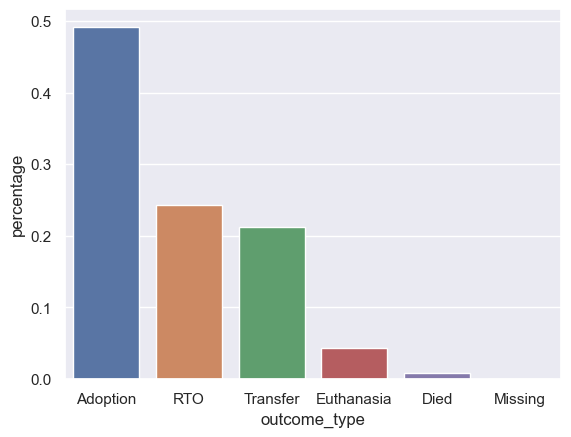

In [6]:
outcomes = shelter_outcomes.outcome_type.value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
outcomes['outcome_type'] = outcomes['outcome_type'].str.replace('Return to Owner', 'RTO')
sns.barplot(x='outcome_type', y='percentage', data = outcomes);

Podemos ver que la adopción es el resultado más común, ocurriendo en un **49%** de los casos. En el **24%** de los casos el animal es devuelto a su anterior dueño, y en **21%** de los casos es transferido a otro centro especializado o devuelto a una colonia callejera semi-controlada. Podemos ver que afortunadamente, la eutanasia sólo ocurre en el **4%** de los casos y que los animales sólo mueren o desaparecen durante su estancia en la perrera en menos de un **1%** de los casos, respectivamente.

__________________________________________________________________________________________________________________

### 2.3. Estadística descriptiva

**Tipos de animales**

Vamos a ver cuántos animales de cada especie han sido dados de alta y de baja en el refugio:

In [7]:
shelter_outcomes.animal_type.value_counts()

Dog    39867
Cat    17038
Name: animal_type, dtype: int64

La proporción de animales de cada especie es la siguiente:

In [8]:
shelter_outcomes.animal_type.value_counts(normalize=True)

Dog    0.700589
Cat    0.299411
Name: animal_type, dtype: float64

También podemos representarlo gráficamente de la siguiente manera:

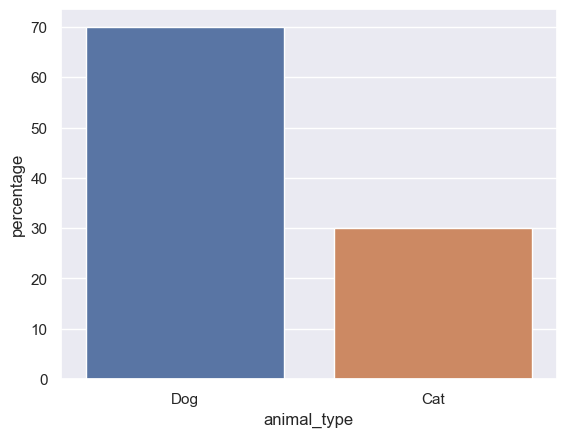

In [9]:
# Creamos un nuevo dataframe que incluya los porcentajes de las variables
animal_types = shelter_outcomes.animal_type.value_counts(normalize=True).reset_index().rename(columns={'animal_type':'percentage','index':'animal_type'})
# Redondeamos y multiplicamos por 100
animal_types['percentage'] = round(100 * animal_types.percentage)
# Creamos el gráfico de barras 
sns.barplot(x='animal_type', y='percentage', data = animal_types);

__________________________________________________________________________________________________________________

**Sexo de los animales**

Observemos el número de animales de cada sexo que han pasado por el refugio:

In [10]:
shelter_outcomes.sex.value_counts()

Male      30370
Female    26535
Name: sex, dtype: int64

Y la proporción:

In [11]:
shelter_outcomes.sex.value_counts(normalize=True)

Male      0.533697
Female    0.466303
Name: sex, dtype: float64

Aunque no se puede explicar por qué, podemos ver que hay más animales macho que hembra en nuestra muestra.

Representémoslo gráficamente:

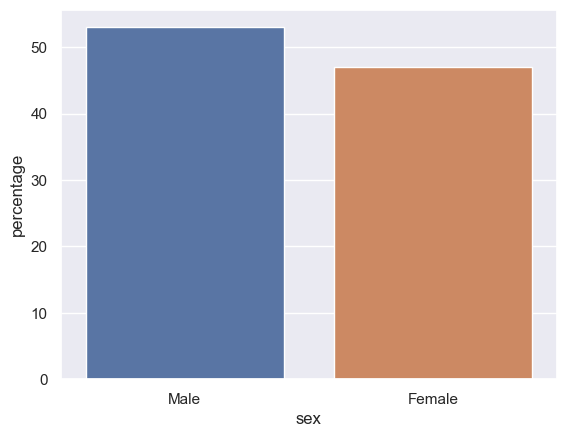

In [12]:
sex = shelter_outcomes.sex.value_counts(normalize=True).reset_index().rename(columns={'sex':'percentage','index':'sex'})
sex['percentage'] = round(100 * sex.percentage)
sns.barplot(x='sex', y='percentage', data = sex);

__________________________________________________________________________________________________________________

**Edad de los animales**

Vamos a generar las estadísticas sobre la edad de los animales cuando son dados de alta en el centro:

In [13]:
shelter_outcomes.age_upon_intake.describe()

count    56905.000000
mean         2.645479
std          3.282239
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         24.000000
Name: age_upon_intake, dtype: float64

Ahora, vamos a representar las frecuencias en un gráfico:

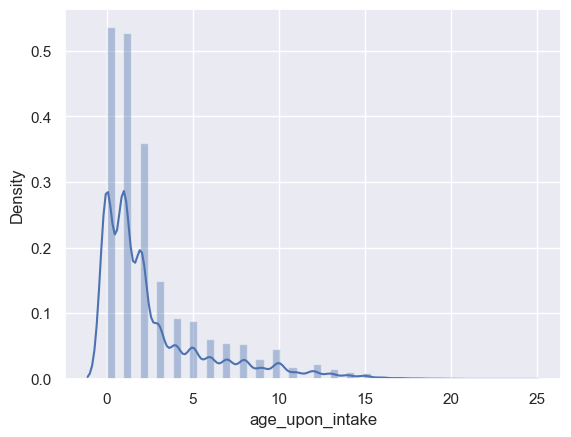

In [14]:
sns.distplot(shelter_outcomes.age_upon_intake);

Repitamos el proceso para las edades a la salida del centro:

In [15]:
shelter_outcomes.age_upon_outcome.describe()

count    56905.000000
mean         2.638415
std          3.338115
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         24.000000
Name: age_upon_outcome, dtype: float64

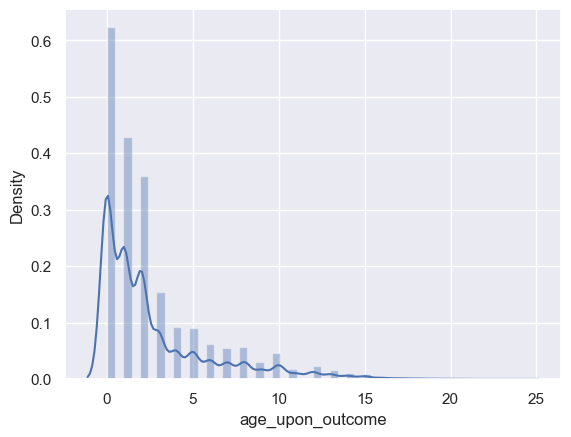

In [16]:
sns.distplot(shelter_outcomes.age_upon_outcome);

Se puede observar que ambas curvas son bastante similares y que la media está en torno a los **2-3 años**, es decir, que la mayoría de animales son relativamente jóvenes. La distribución es bastante semejante a una **distribución lognormal negativa**.

__________________________________________________________________________________________________________________

**Raza de los animales**

Examinemos cuántos animales de raza y mestizos han llegado al refugio:

In [17]:
shelter_outcomes.purebred.value_counts()

False    50844
True      6061
Name: purebred, dtype: int64

Y su proporción:

In [18]:
shelter_outcomes.purebred.value_counts(normalize=True)

False    0.893489
True     0.106511
Name: purebred, dtype: float64

Representémoslo mediante un gráfico de barras:

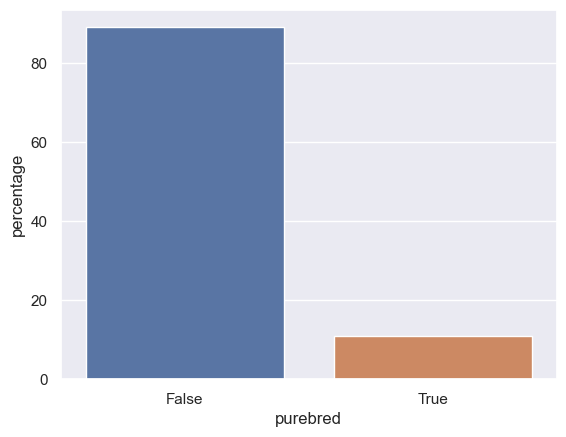

In [19]:
purebred = shelter_outcomes.purebred.value_counts(normalize=True).reset_index().rename(columns={'purebred':'percentage','index':'purebred'})
purebred['percentage'] = round(100 * purebred.percentage)
sns.barplot(x='purebred', y='percentage', data = purebred);

¿Cambiarían las proporciones en base a la especie del animal? Vamos a comprobarlo.

Primero, observemos la proporción de perros de raza:

In [20]:
shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Dog')]['purebred'].value_counts(normalize=True)

False    0.853237
True     0.146763
Name: purebred, dtype: float64

La cual representada gráficamente sería:

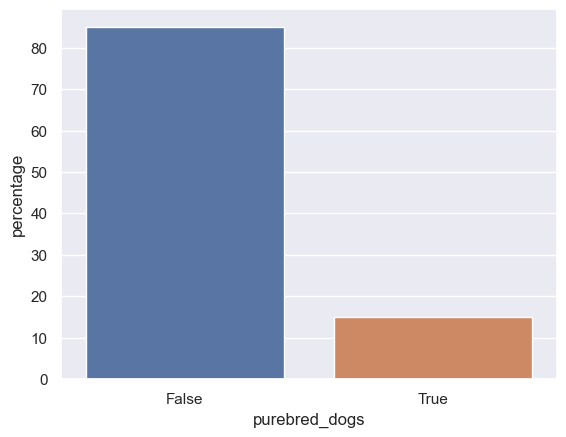

In [21]:
purebred_dogs = shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Dog')]['purebred'].value_counts(normalize=True).reset_index().rename(columns={'purebred':'percentage','index':'purebred_dogs'})
purebred_dogs['percentage'] = round(100 * purebred_dogs.percentage)
sns.barplot(x='purebred_dogs', y='percentage', data = purebred_dogs);

Comprobemos todas las razas posibles que pueden tener los perros no mestizos:

In [22]:
shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Dog') & (shelter_outcomes.purebred == True)]['breed_1'].unique()

array(['Pembroke Welsh Corgi', 'Australian Shepherd', 'German Shepherd',
       'Chihuahua Shorthair', 'Akita', 'Pit Bull', 'Bull Terrier',
       'Boston Terrier', 'Siberian Husky', 'Labrador Retriever',
       'Great Pyrenees', 'Shih Tzu', 'Australian Cattle Dog', 'Beagle',
       'Standard Poodle', 'Black Mouth Cur', 'Doberman Pinsch',
       'Bluetick Hound', 'Rottweiler', 'Basset Hound', 'Boxer',
       'American Staffordshire Terrier', 'Chihuahua Longhair',
       'Tibetan Terrier', 'Cocker Spaniel', 'Great Dane',
       'Golden Retriever', 'Chow Chow', 'Mastiff', 'Maltese',
       'Bearded Collie', 'Dachshund', 'Miniature Schnauzer',
       'Miniature Poodle', 'Bernese Mountain Dog',
       'American Pit Bull Terrier', 'Wire Hair Fox Terrier',
       'Border Collie', 'Toy Poodle', 'Pointer', 'Yorkshire Terrier',
       'German Wirehaired Pointer', 'Plott Hound', 'Rhod Ridgeback',
       'Cairn Terrier', 'German Shorthair Pointer', 'Pekingese', 'Pug',
       'Collie Rough', 'Cata

Podemos observar que en total hay 166 razas posibles:

In [23]:
len(shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Dog') & (shelter_outcomes.purebred == True)]['breed_1'].unique())

165

Vamos a observar cuáles son las razas más comunes entre los perros no mestizos:

In [24]:
shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Dog') & (shelter_outcomes.purebred == True)]['breed_1'].value_counts(normalize=True)

Pit Bull               0.126645
Chihuahua Shorthair    0.104256
Labrador Retriever     0.094172
German Shepherd        0.086310
Siberian Husky         0.044608
                         ...   
American Foxhound      0.000171
Boykin Span            0.000171
Picardy Sheepdog       0.000171
Alaskan Klee Kai       0.000171
Irish Setter           0.000171
Name: breed_1, Length: 165, dtype: float64

Podemos ver que las cinco razas más comunes son los pitbulls (13%), chihuahuas (10%), labradores (10%), pastores alemanes (9%) y huskies (4%). En total, estas cinco razas más comunes representan **casi la mitad de los perros de raza (46%)**.

Gráficamente, podemos representar las cinco razas de perro más comunes de esta manera:

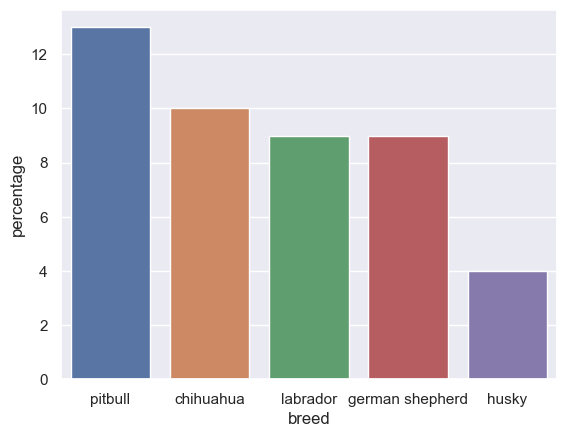

In [25]:
# Usamos head para mantener solo los primeros 5 resultados
purebred_dog_breeds = shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Dog') & (shelter_outcomes.purebred == True)]['breed_1'].value_counts(normalize=True).reset_index().rename(columns={'breed_1':'percentage','index':'breed'}).sort_values(by = 'percentage', axis = 0, ascending = False).head()
purebred_dog_breeds['percentage'] = round(100 * purebred_dog_breeds.percentage)
purebred_dog_breeds['breed'] = purebred_dog_breeds.breed.str.replace('Pit Bull', 'pitbull')
purebred_dog_breeds['breed'] = purebred_dog_breeds.breed.str.replace('Chihuahua Shorthair', 'chihuahua')
purebred_dog_breeds['breed'] = purebred_dog_breeds.breed.str.replace('Labrador Retriever', 'labrador')
purebred_dog_breeds['breed'] = purebred_dog_breeds.breed.str.replace('German Shepherd', 'german shepherd')
purebred_dog_breeds['breed'] = purebred_dog_breeds.breed.str.replace('Siberian Husky', 'husky')
sns.barplot(x='breed', y='percentage', data = purebred_dog_breeds);

Repitamos estos pasos, observando esta vez nuestra muestra de gatos.

Observemos qué porcentaje de gatos es de raza:

In [26]:
shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Cat')]['purebred'].value_counts(normalize=True)

False    0.987675
True     0.012325
Name: purebred, dtype: float64

Podemos ver que el porcentaje de gatos de raza es aún menor que en los perros, siendo poco más del *1%*. Vamos a representarlo gráficamente:

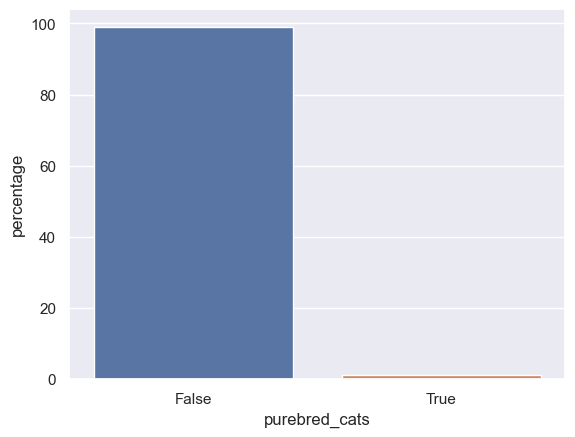

In [27]:
purebred_cats = shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Cat')]['purebred'].value_counts(normalize=True).reset_index().rename(columns={'purebred':'percentage','index':'purebred_cats'})
purebred_cats['percentage'] = round(100 * purebred_cats.percentage)
sns.barplot(x='purebred_cats', y='percentage', data = purebred_cats);

Ahora, vamos a ver las distintas razas de gato posibles:

In [28]:
shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Cat') & (shelter_outcomes.purebred == True)]['breed_1'].unique()

array(['Siamese', 'Russian Blue', 'Abyssinian', 'Maine Coon', 'Manx',
       'Snowshoe', 'American Curl Shorthair', 'Himalayan', 'Persian',
       'Cornish Rex', 'Sphynx', 'British Shorthair', 'Tonkinese',
       'Balinese', 'American Shorthair', 'Bengal', 'Havana Brown',
       'Devon Rex', 'Ragdoll', 'Oriental Sh', 'Pixiebob Shorthair',
       'Burmese'], dtype=object)

Es evidente que hay menos variabilidad en las posibles razas entre gatos que entre perros. En total, los gatos tienen **22 razas posibles**.

In [29]:
len(shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Cat') & (shelter_outcomes.purebred == True)]['breed_1'].unique())

22

Examinemos qué proporcion de los gatos no mestizos representa cada raza:

In [30]:
shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Cat') & (shelter_outcomes.purebred == True)]['breed_1'].value_counts(normalize=True)

Siamese                    0.480952
American Shorthair         0.095238
Maine Coon                 0.080952
Snowshoe                   0.047619
Persian                    0.047619
Russian Blue               0.042857
Manx                       0.038095
Himalayan                  0.038095
Bengal                     0.023810
Devon Rex                  0.014286
British Shorthair          0.014286
Sphynx                     0.014286
Havana Brown               0.009524
Abyssinian                 0.009524
Ragdoll                    0.009524
Tonkinese                  0.004762
Balinese                   0.004762
Cornish Rex                0.004762
American Curl Shorthair    0.004762
Oriental Sh                0.004762
Pixiebob Shorthair         0.004762
Burmese                    0.004762
Name: breed_1, dtype: float64

Podemos observar que los **gatos siameses** son la raza más común, representando un **48%** de los gatos de raza. Las 4 siguientes razas son los American shorthair, los Maine Coon, los Snow Shoe (una mezcla entre siamés y American shorthair) y los gatos persa.

Vamos a representar estas proporciones mediante un gráfico de barras:

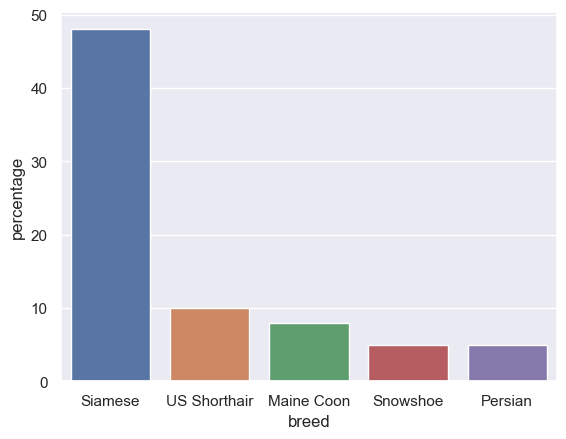

In [31]:
purebred_cat_breeds = shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Cat') & (shelter_outcomes.purebred == True)]['breed_1'].value_counts(normalize=True).reset_index().rename(columns={'breed_1':'percentage','index':'breed'}).sort_values(by = 'percentage', axis = 0, ascending = False).head()
purebred_cat_breeds['percentage'] = round(100 * purebred_cat_breeds.percentage)
purebred_cat_breeds['breed'] = purebred_cat_breeds.breed.str.replace('American Shorthair', 'US Shorthair')
sns.barplot(x='breed', y='percentage', data = purebred_cat_breeds);

Sin embargo, si comparamos estos porcentajes con la población total de gatos, podemos ver que incluso estas razas representan un porcentaje muy pequeño del total:

In [32]:
shelter_outcomes.loc[shelter_outcomes.animal_type == 'Cat']['breed_1'].value_counts(normalize=True)

Domestic Shorthair         0.786184
Domestic Medium Hair       0.090034
Domestic Longhair          0.050886
Siamese                    0.037328
American Shorthair         0.005928
Snowshoe                   0.005576
Maine Coon                 0.005517
Russian Blue               0.003228
Manx                       0.003111
Himalayan                  0.001937
Ragdoll                    0.001819
Persian                    0.001467
Bengal                     0.000939
British Shorthair          0.000587
Balinese                   0.000587
American Curl Shorthair    0.000470
Angora                     0.000470
Devon Rex                  0.000411
Abyssinian                 0.000411
Bombay                     0.000293
Japanese Bobtail           0.000293
Oriental Sh                0.000235
Tonkinese                  0.000235
Burmese                    0.000235
Turkish Van                0.000235
Cornish Rex                0.000176
Sphynx                     0.000176
Norwegian Forest Cat       0

Podemos ver que los siameses sólo representan un 4% del total de gatos.

Representémoslo mediante un gráfico de barras:

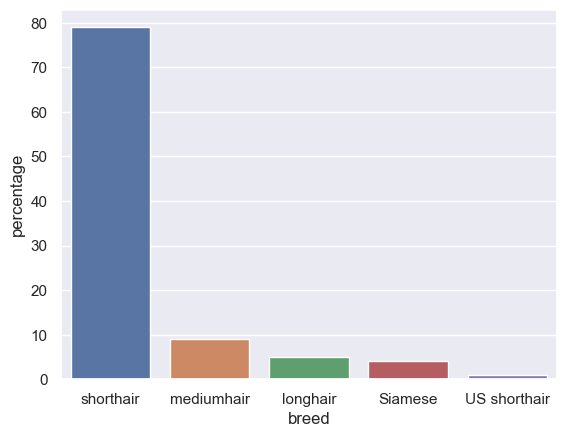

In [33]:
cat_breeds = shelter_outcomes.loc[shelter_outcomes.animal_type == 'Cat']['breed_1'].value_counts(normalize=True).reset_index().rename(columns={'breed_1':'percentage','index':'breed'}).sort_values(by = 'percentage', axis = 0, ascending = False).head()
cat_breeds['percentage'] = round(100 * cat_breeds.percentage)
cat_breeds['breed'] = cat_breeds.breed.str.replace('Domestic Shorthair', 'shorthair')
cat_breeds['breed'] = cat_breeds.breed.str.replace('Domestic Medium Hair', 'mediumhair')
cat_breeds['breed'] = cat_breeds.breed.str.replace('Domestic Longhair', 'longhair')
cat_breeds['breed'] = cat_breeds.breed.str.replace('American Shorthair', 'US shorthair')
sns.barplot(x='breed', y='percentage', data = cat_breeds);

__________________________________________________________________________________________________________________

**Color de los animales**

Vamos a observar la distribución de los distintos colores en los animales de nuestra muestra.

Primero, observemos la proporción para los animales de cualquier especie:

In [34]:
shelter_outcomes['color_1'].value_counts(normalize=True)

Black       0.353642
White       0.256410
Brown       0.131605
Gray        0.101661
Tricolor    0.087866
Orange      0.040436
Cream       0.028381
Name: color_1, dtype: float64

Podemos ver que el color más común es el negro (**39%** de los animales son de este color).

Representemos mediante un gráfico de barras los cinco colores más comunes entre todos los animales:

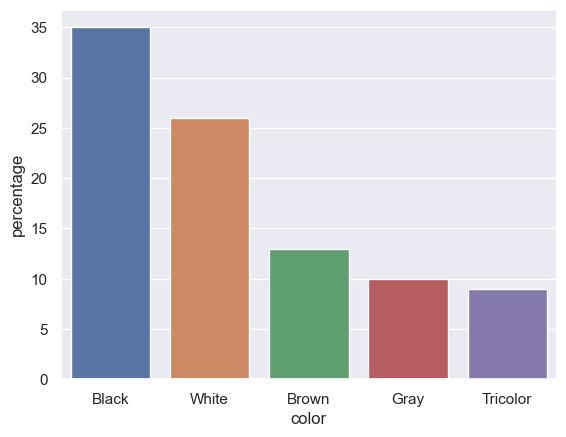

In [35]:
colors = shelter_outcomes['color_1'].value_counts(normalize=True).reset_index().rename(columns={'color_1':'percentage','index':'color'}).sort_values(by = 'percentage', axis = 0, ascending = False).head()
colors['percentage'] = round(100 * colors.percentage)
sns.barplot(x='color', y='percentage', data = colors);

Veamos si esta tendencia se mantiene en los perros:

In [36]:
shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Dog')]['color_1'].value_counts(normalize=True)

Black       0.394060
White       0.293024
Brown       0.124915
Gray        0.069406
Tricolor    0.061530
Cream       0.033060
Orange      0.024005
Name: color_1, dtype: float64

Aunque los porcentajes son ligeramente distintos, el ranking de colores sigue siendo el mismo:

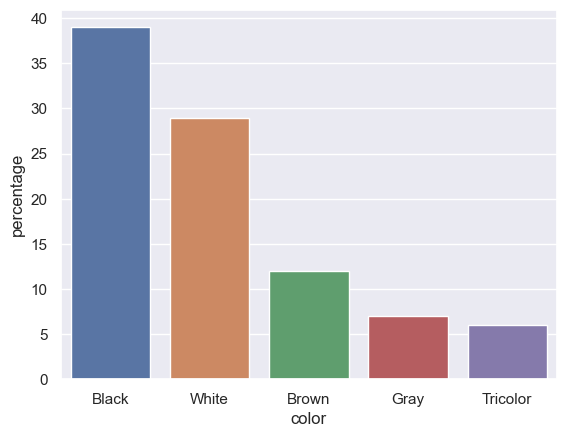

In [37]:
dog_colors = shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Dog')]['color_1'].value_counts(normalize=True).reset_index().rename(columns={'color_1':'percentage','index':'color'}).sort_values(by = 'percentage', axis = 0, ascending = False).head()
dog_colors['percentage'] = round(100 * dog_colors.percentage)
sns.barplot(x='color', y='percentage', data = dog_colors);

¿Cambiaría este ránking si observamos nuestra muestra de gatos?

In [38]:
shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Cat')]['color_1'].value_counts(normalize=True)

Black       0.259068
Gray        0.177133
White       0.170736
Tricolor    0.149489
Brown       0.147259
Orange      0.078882
Cream       0.017432
Name: color_1, dtype: float64

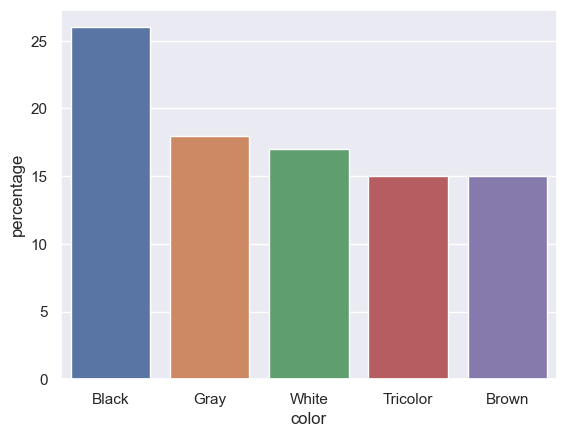

In [39]:
cat_colors = shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Cat')]['color_1'].value_counts(normalize=True).reset_index().rename(columns={'color_1':'percentage','index':'color'}).sort_values(by = 'percentage', axis = 0, ascending = False).head()
cat_colors['percentage'] = round(100 * cat_colors.percentage)
sns.barplot(x='color', y='percentage', data = cat_colors);

Podemos ver que en los gatos, el color negro sigue siendo el más popular pero en una proporción menor, y que entre gatos, el pelaje tricolor es más común que el marrón sólido.

__________________________________________________________________________________________________________________

**Estado de esterilización**

Vamos a examinar los datos sobre el estado de esterilización de los animales.

Primero, observaremos el estado de esterilización de los animales al llegar al centro.

In [40]:
shelter_outcomes.sterilized_upon_intake.value_counts(normalize=True)

False    0.664458
True     0.335542
Name: sterilized_upon_intake, dtype: float64

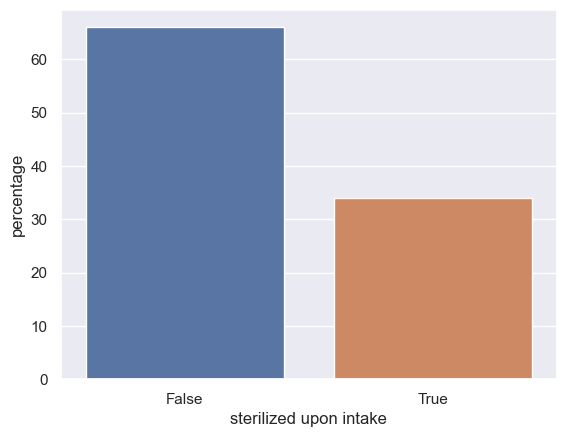

In [41]:
SUI = shelter_outcomes.sterilized_upon_intake.value_counts(normalize=True).reset_index().rename(columns={'sterilized_upon_intake':'percentage','index':'sterilized upon intake'})
SUI['percentage'] = round(100 * SUI.percentage)
sns.barplot(x='sterilized upon intake', y='percentage', data = SUI);

Vamos a evaluar si hay alguna disparidad entre los datos de esterilización en el momento del alta de los perros y de los gatos.

Primero, vamos a observar la proporción de perros que llegan al refugio esterilizados:

In [42]:
shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Dog')]['sterilized_upon_intake'].value_counts(normalize=True)

False    0.657536
True     0.342464
Name: sterilized_upon_intake, dtype: float64

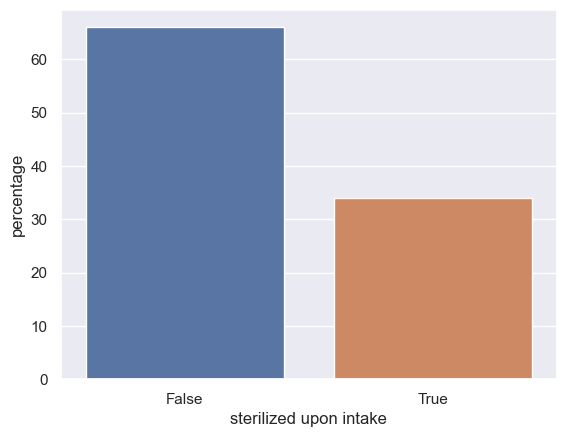

In [43]:
SUI_dogs = shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Dog')]['sterilized_upon_intake'].value_counts(normalize=True).reset_index().rename(columns={'sterilized_upon_intake':'percentage','index':'sterilized upon intake'})
SUI_dogs['percentage'] = round(100 * SUI_dogs.percentage)
sns.barplot(x='sterilized upon intake', y='percentage', data = SUI_dogs);

Y ahora, vamos a examinar la de los gatos:

In [44]:
shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Cat')]['sterilized_upon_intake'].value_counts(normalize=True)

False    0.680655
True     0.319345
Name: sterilized_upon_intake, dtype: float64

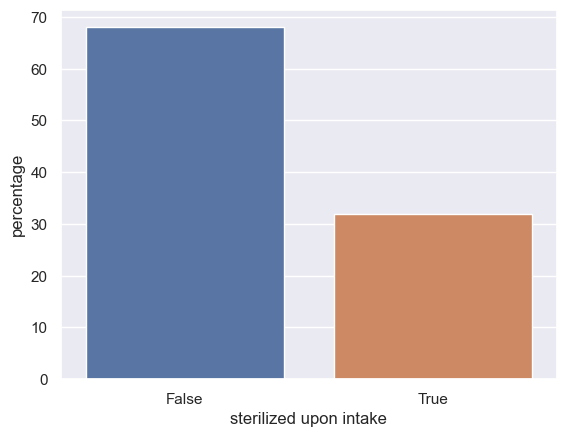

In [45]:
SUI_cats = shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Cat')]['sterilized_upon_intake'].value_counts(normalize=True).reset_index().rename(columns={'sterilized_upon_intake':'percentage','index':'sterilized upon intake'})
SUI_cats['percentage'] = round(100 * SUI_cats.percentage)
sns.barplot(x='sterilized upon intake', y='percentage', data = SUI_cats);

Podemos ver que **los gatos tienen un 2% menos de probabilidades de estar esterilizados** a la hora del alta que los perros.

Puede que esto se deba a que hay un mayor porcentaje de gatos callejeros que de perros. Vamos a comprobarlo.

Esta es la proporción de cada `intake_type` para los perros:

In [46]:
shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Dog')]['intake_type'].value_counts(normalize=True)

Stray                 0.748413
Owner Surrender       0.155166
Public Assist         0.090702
Euthanasia Request    0.003963
Abandoned             0.001756
Name: intake_type, dtype: float64

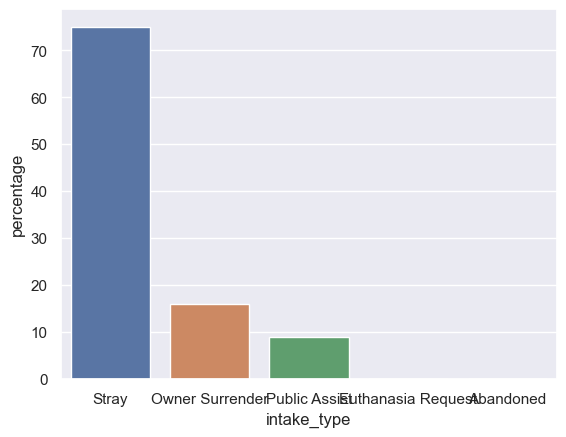

In [47]:
intake_type_dogs = shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Dog')]['intake_type'].value_counts(normalize=True).reset_index().rename(columns={'intake_type':'percentage','index':'intake_type'})
intake_type_dogs['percentage'] = round(100 * intake_type_dogs.percentage)
sns.barplot(x='intake_type', y='percentage', data = intake_type_dogs);

Y la de los gatos:

In [48]:
shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Cat')]['intake_type'].value_counts(normalize=True)

Stray                 0.771980
Owner Surrender       0.192746
Public Assist         0.030813
Euthanasia Request    0.002465
Abandoned             0.001996
Name: intake_type, dtype: float64

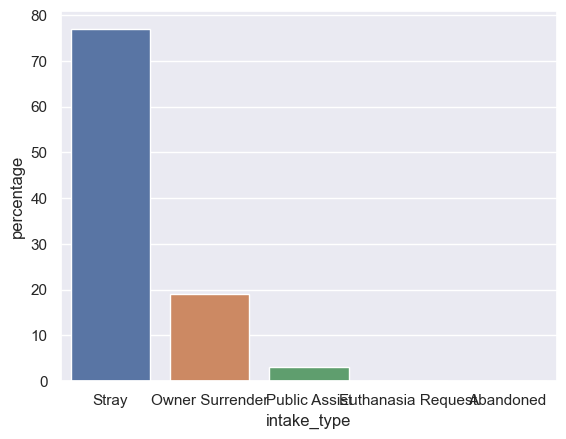

In [49]:
intake_type_cats = shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Cat')]['intake_type'].value_counts(normalize=True).reset_index().rename(columns={'intake_type':'percentage','index':'intake_type'})
intake_type_cats['percentage'] = round(100 * intake_type_cats.percentage)
sns.barplot(x='intake_type', y='percentage', data = intake_type_cats);

Tal y como asumía, de los gatos que entran al centro, hay un mayor porcentaje (**2%**) que son callejeros que los perros, lo que podría explicar esta discrepancia en los datos de esterilización.

Tras haber observado los datos desglosados por especie, vamos a examinar si hay una disparidad entre sexos en los datos de esterilización al alta.

Estos son los porcentajes de animales macho que están castrados al ser dados de alta en el refugio:

In [50]:
shelter_outcomes.loc[(shelter_outcomes.sex == 'Male')]['sterilized_upon_intake'].value_counts(normalize=True)

False    0.663319
True     0.336681
Name: sterilized_upon_intake, dtype: float64

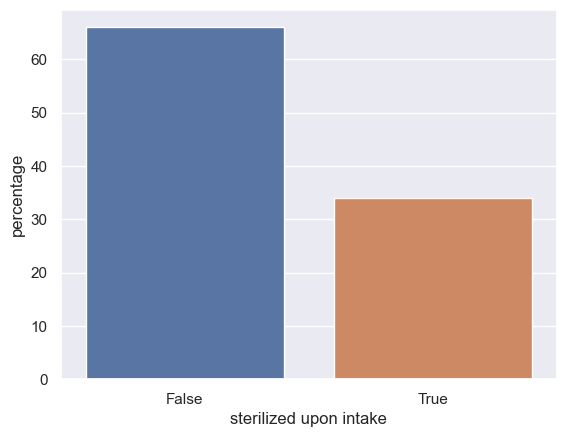

In [51]:
SUI_males = shelter_outcomes.loc[(shelter_outcomes.sex == 'Male')]['sterilized_upon_intake'].value_counts(normalize=True).reset_index().rename(columns={'sterilized_upon_intake':'percentage','index':'sterilized upon intake'})
SUI_males['percentage'] = round(100 * SUI_males.percentage)
sns.barplot(x='sterilized upon intake', y='percentage', data = SUI_males);

Y estos son los de las hembras:

In [52]:
shelter_outcomes.loc[(shelter_outcomes.sex == 'Female')]['sterilized_upon_intake'].value_counts(normalize=True)

False    0.665762
True     0.334238
Name: sterilized_upon_intake, dtype: float64

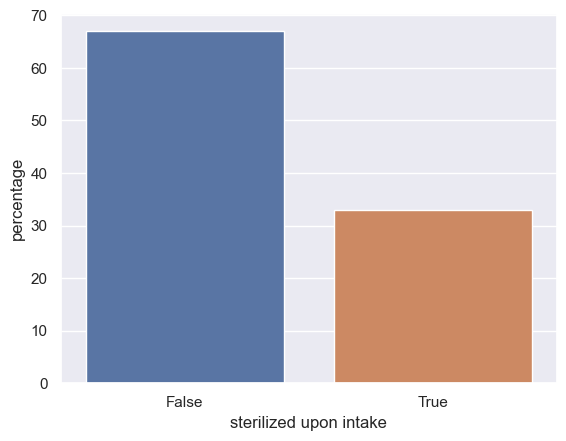

In [53]:
SUI_females = shelter_outcomes.loc[(shelter_outcomes.sex == 'Female')]['sterilized_upon_intake'].value_counts(normalize=True).reset_index().rename(columns={'sterilized_upon_intake':'percentage','index':'sterilized upon intake'})
SUI_females['percentage'] = round(100 * SUI_females.percentage)
sns.barplot(x='sterilized upon intake', y='percentage', data = SUI_females);

Podemos ver que los datos para cada sexo son bastante equiparables.

Ahora, observemos los datos de esterilización a la salida del centro:

In [54]:
shelter_outcomes.sterilized_upon_outcome .value_counts(normalize=True)

True     0.768526
False    0.231474
Name: sterilized_upon_outcome, dtype: float64

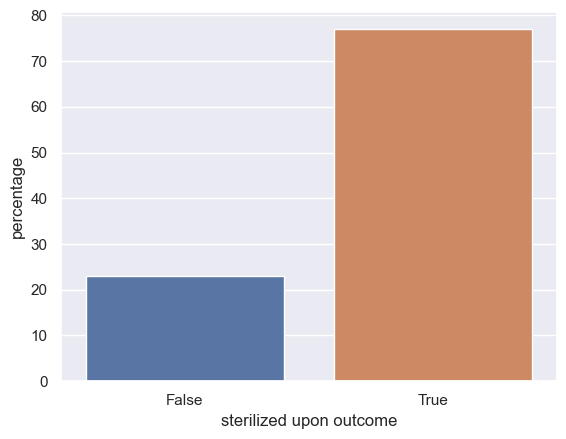

In [55]:
SUO = shelter_outcomes.sterilized_upon_outcome.value_counts(normalize=True).reset_index().rename(columns={'sterilized_upon_outcome':'percentage','index':'sterilized upon outcome'})
SUO['percentage'] = round(100 * SUO.percentage)
sns.barplot(x='sterilized upon outcome', y='percentage', data = SUO);

Podemos ver que ha habido un incremento del **10%** en las tasas de esterilización. Este porcentaje es más bajo de lo que uno podría esperar desde una perspectiva española, ya que aquí la mayoría de protectoras de animales esterilizan obligatoriamente a los animales.

Veamos si en los datos a la salida hay asimetrías basado en la especie. Primero observaremos los porcentajes de esterilización tomados durante la baja del centro de los perros:

In [56]:
shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Dog')]['sterilized_upon_outcome'].value_counts(normalize=True)

True     0.788271
False    0.211729
Name: sterilized_upon_outcome, dtype: float64

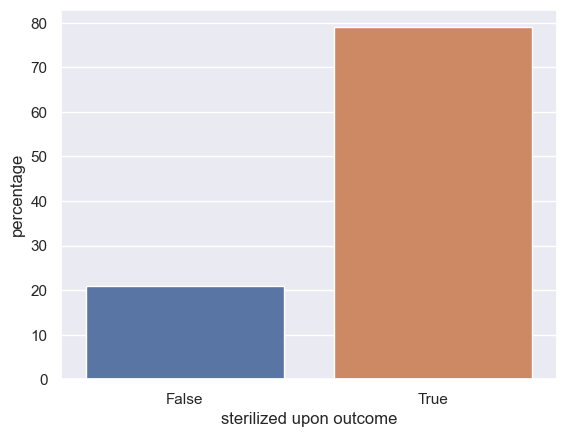

In [57]:
SUO_dogs = shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Dog')]['sterilized_upon_outcome'].value_counts(normalize=True).reset_index().rename(columns={'sterilized_upon_outcome':'percentage','index':'sterilized upon outcome'})
SUO_dogs['percentage'] = round(100 * SUO_dogs.percentage)
sns.barplot(x='sterilized upon outcome', y='percentage', data = SUO_dogs);

A continuación, repetiremos el proceso para los gatos:

In [58]:
shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Cat')]['sterilized_upon_outcome'].value_counts(normalize=True)

True     0.722327
False    0.277673
Name: sterilized_upon_outcome, dtype: float64

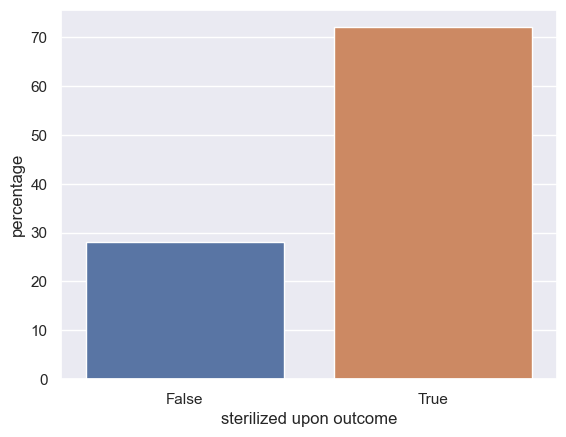

In [59]:
SUO_cats = shelter_outcomes.loc[(shelter_outcomes.animal_type == 'Cat')]['sterilized_upon_outcome'].value_counts(normalize=True).reset_index().rename(columns={'sterilized_upon_outcome':'percentage','index':'sterilized upon outcome'})
SUO_cats['percentage'] = round(100 * SUO_cats.percentage)
sns.barplot(x='sterilized upon outcome', y='percentage', data = SUO_cats);

Podemos ver que no sólo sigue habiendo una asimetría, si no que esta se agudiza a la salida del centro. Es decir, cuando los animales son dados de alta en el centro, la diferencia entre los porcentajes de esterilización de los gatos y los perros es del 2%. A la salida, la diferencia es del 7%.

Por lo tanto, **menos gatos que perros están siendo esterilizados** en el refugio. 

Esto es bastante extraño, ya que es más común que los gatos sean parte de un programa de captura, esterilización y devolución a la colonia. 

Observemos si también hay asimetrías en los datos de esterilización a la salida entre machos y hembras.

Estos son los datos para los animales macho:

In [60]:
shelter_outcomes.loc[(shelter_outcomes.sex == 'Male')]['sterilized_upon_outcome'].value_counts(normalize=True)

True     0.770991
False    0.229009
Name: sterilized_upon_outcome, dtype: float64

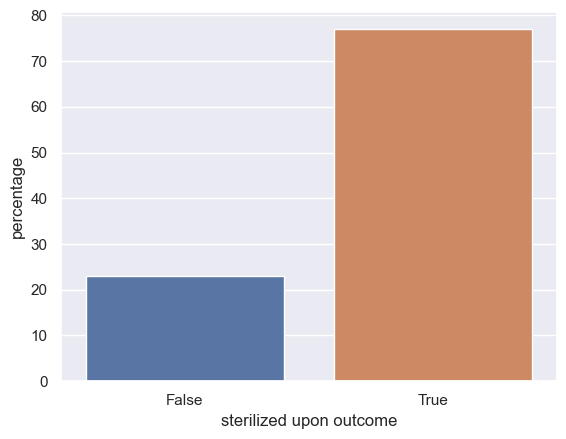

In [61]:
SUO_males = shelter_outcomes.loc[(shelter_outcomes.sex == 'Male')]['sterilized_upon_outcome'].value_counts(normalize=True).reset_index().rename(columns={'sterilized_upon_outcome':'percentage','index':'sterilized upon outcome'})
SUO_males['percentage'] = round(100 * SUO_males.percentage)
sns.barplot(x='sterilized upon outcome', y='percentage', data = SUO_males);

Y los de las hembras:

In [62]:
shelter_outcomes.loc[(shelter_outcomes.sex == 'Female')]['sterilized_upon_outcome'].value_counts(normalize=True)

True     0.765706
False    0.234294
Name: sterilized_upon_outcome, dtype: float64

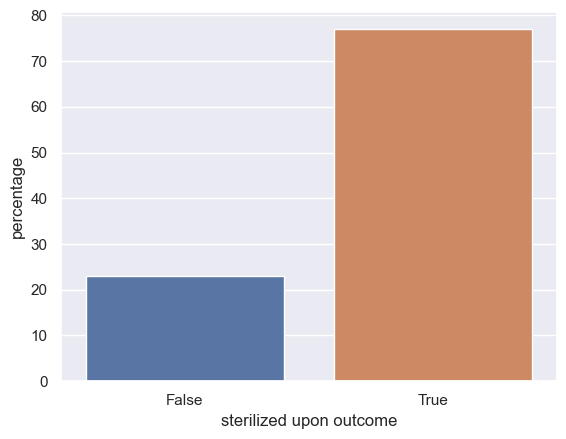

In [63]:
SUO_females = shelter_outcomes.loc[(shelter_outcomes.sex == 'Female')]['sterilized_upon_outcome'].value_counts(normalize=True).reset_index().rename(columns={'sterilized_upon_outcome':'percentage','index':'sterilized upon outcome'})
SUO_females['percentage'] = round(100 * SUO_females.percentage)
sns.barplot(x='sterilized upon outcome', y='percentage', data = SUO_females);

Podemos ver que los datos están bastante igualados entre ambos sexos.

A continuación, vamos a crear un gráfico comparando el porcentaje de animales esterilizados a la entrada con la salida:

In [64]:
SUO_True = SUO.loc[SUO['sterilized upon outcome'] == True].reset_index(drop = True)
SUO_True.drop('sterilized upon outcome', axis = 1, inplace = True)
SUO_True['when'] = 'outcome'

SUI_True = SUI.loc[SUI['sterilized upon intake'] == True].reset_index(drop = True)
SUI_True.drop('sterilized upon intake', axis = 1, inplace = True)
SUI_True['when'] = 'intake'

sterilized_comparison = SUI_True.merge(SUO_True, how = 'outer')
sterilized_comparison

,percentage,when
0,34.0,intake
1,77.0,outcome


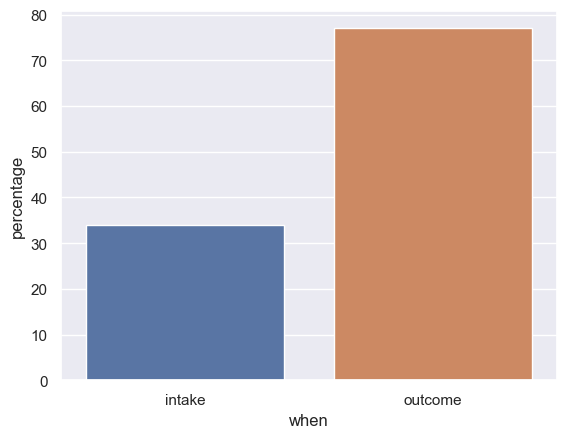

In [65]:
sns.barplot(x='when', y='percentage', data = sterilized_comparison);

En este gráfico se percibe claramente el significante incremento en el porcentaje de animales esterilizados entre el alta en el centro y la baja.

Por último, vamos a examinar si el estado de esterilización del animal afecta su `outcome_type`.

Observemos los datos para los animales que sí están esterilizados en el momento de la baja:

In [66]:
shelter_outcomes.loc[shelter_outcomes['sterilized_upon_outcome'] == True]['outcome_type'].value_counts(normalize=True)

Adoption           0.617726
Return to Owner    0.226328
Transfer           0.131457
Euthanasia         0.021265
Died               0.003018
Missing            0.000206
Name: outcome_type, dtype: float64

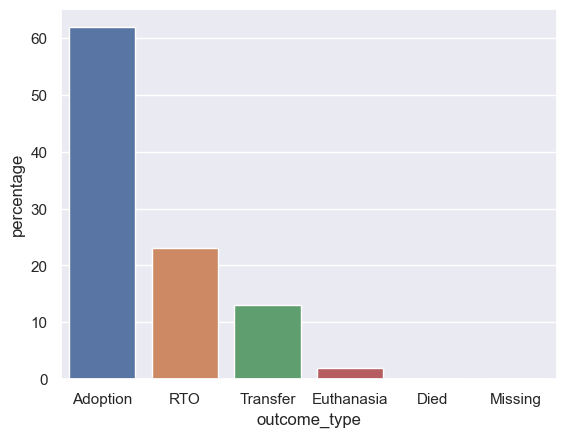

In [67]:
sterilized_outcomes = shelter_outcomes.loc[shelter_outcomes['sterilized_upon_outcome'] == True].outcome_type.value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
sterilized_outcomes['percentage'] = round(100 * sterilized_outcomes.percentage)
sterilized_outcomes['outcome_type'] = sterilized_outcomes['outcome_type'].str.replace('Return to Owner', 'RTO')
sns.barplot(x='outcome_type', y='percentage', data = sterilized_outcomes);

Y para los animales que **no** están esterilizados:

In [68]:
shelter_outcomes.loc[shelter_outcomes['sterilized_upon_outcome'] == False]['outcome_type'].value_counts(normalize=True)

Transfer           0.483298
Return to Owner    0.299954
Euthanasia         0.115624
Adoption           0.073565
Died               0.026268
Missing            0.001291
Name: outcome_type, dtype: float64

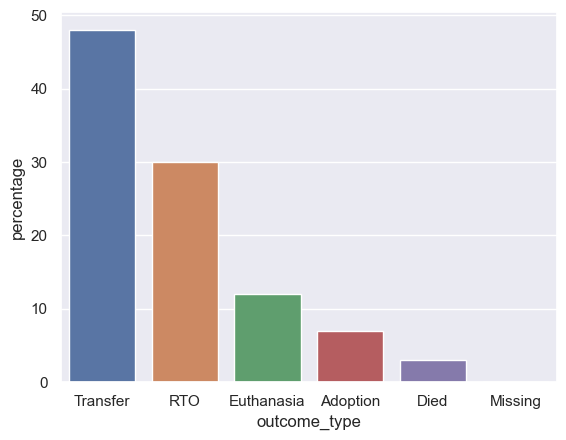

In [69]:
unsterilized_outcomes = shelter_outcomes.loc[shelter_outcomes['sterilized_upon_outcome'] != True].outcome_type.value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
unsterilized_outcomes['percentage'] = round(100 * unsterilized_outcomes.percentage)
unsterilized_outcomes['outcome_type'] = unsterilized_outcomes['outcome_type'].str.replace('Return to Owner', 'RTO')
sns.barplot(x='outcome_type', y='percentage', data = unsterilized_outcomes);

Podemos ver que sí que hay una diferencia muy significativa: los animales esterilizados son adoptados el 62% de las veces, mientras que los no esterilizados sólo el 7%.

Sin embargo, no podemos asumir que esta diferencia se deba a una relación causativa. Es decir, lo más probable es que los animales sólo sean esterilizados antes de ser dados en adopción.

__________________________________________________________________________________________________________________

**Intake type**

Observemos las distintas razones por las que un animal puede ser entregado al refugio y los porcentajes de cada una:

In [70]:
shelter_outcomes.intake_type.value_counts(normalize=True)

Stray                 0.755470
Owner Surrender       0.166418
Public Assist         0.072770
Euthanasia Request    0.003515
Abandoned             0.001828
Name: intake_type, dtype: float64

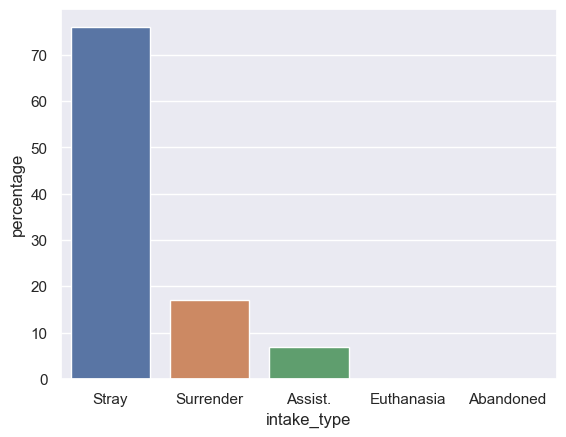

In [71]:
intake_type = shelter_outcomes.intake_type.value_counts(normalize=True).reset_index().rename(columns={'intake_type':'percentage','index':'intake_type'}).head()
intake_type['percentage'] = round(100 * intake_type.percentage)
intake_type['intake_type'] = intake_type['intake_type'].str.replace('Owner Surrender', 'Surrender')
intake_type['intake_type'] = intake_type['intake_type'].str.replace('Public Assist', 'Assist.')
intake_type['intake_type'] = intake_type['intake_type'].str.replace('Euthanasia Request', 'Euthanasia')
sns.barplot(x='intake_type', y='percentage', data = intake_type);

Podemos ver que la mayoría de animales que son ingresados al refugio son callejeros. Vamos a ver las tasas de adopción para estos animales:

In [72]:
shelter_outcomes.loc[shelter_outcomes.intake_type == 'Stray'].outcome_type.value_counts(normalize=True)

Adoption           0.501465
Return to Owner    0.229891
Transfer           0.219330
Euthanasia         0.039521
Died               0.009281
Missing            0.000512
Name: outcome_type, dtype: float64

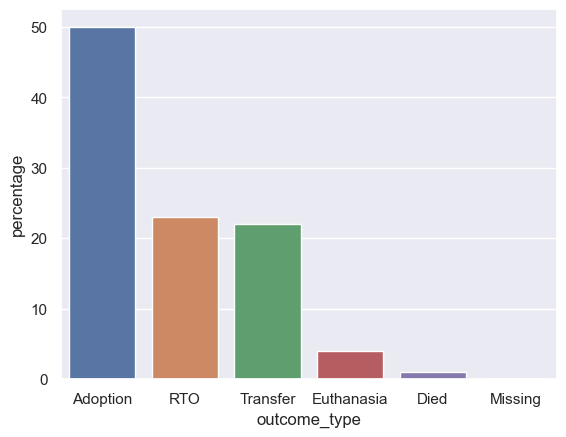

In [73]:
stray_outcome = shelter_outcomes.loc[shelter_outcomes.intake_type == 'Stray']['outcome_type'].value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
stray_outcome['percentage'] = round(100 * stray_outcome.percentage)
stray_outcome['outcome_type'] = stray_outcome['outcome_type'].str.replace('Return to Owner', 'RTO')
sns.barplot(x='outcome_type', y='percentage', data = stray_outcome);

Y para aquellos que hayan sido entregados por su anterior dueño:

In [74]:
shelter_outcomes.loc[shelter_outcomes.intake_type == 'Owner Surrender'].outcome_type.value_counts(normalize=True)

Adoption           0.620169
Transfer           0.244667
Return to Owner    0.077508
Euthanasia         0.050475
Died               0.006758
Missing            0.000422
Name: outcome_type, dtype: float64

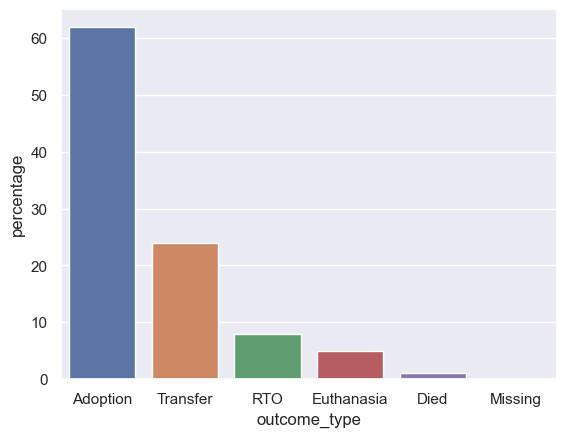

In [75]:
surrendered_outcome = shelter_outcomes.loc[shelter_outcomes.intake_type == 'Owner Surrender']['outcome_type'].value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
surrendered_outcome['percentage'] = round(100 * surrendered_outcome.percentage)
surrendered_outcome['outcome_type'] = surrendered_outcome['outcome_type'].str.replace('Return to Owner', 'RTO')
sns.barplot(x='outcome_type', y='percentage', data = surrendered_outcome);

Las tasas de adopción para los animales que han ingresado al centro porque su dueño estaba incapacitado para cuidarlos son las siguientes:

In [76]:
shelter_outcomes.loc[shelter_outcomes.intake_type == 'Public Assist'].outcome_type.value_counts(normalize=True)

Return to Owner    0.775417
Adoption           0.117121
Transfer           0.076552
Euthanasia         0.027771
Died               0.003139
Name: outcome_type, dtype: float64

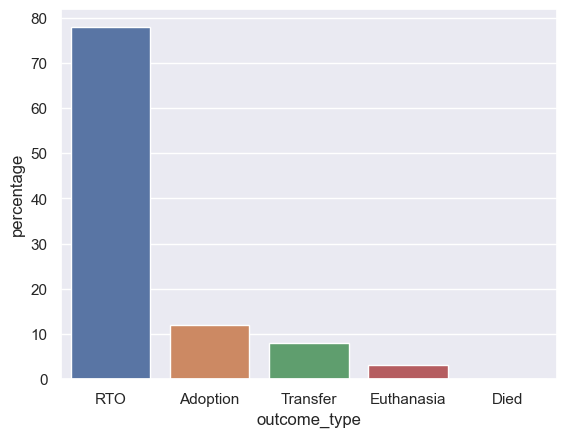

In [77]:
assist_outcome = shelter_outcomes.loc[shelter_outcomes.intake_type == 'Public Assist']['outcome_type'].value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
assist_outcome['percentage'] = round(100 * assist_outcome.percentage)
assist_outcome['outcome_type'] = assist_outcome['outcome_type'].str.replace('Return to Owner', 'RTO')
sns.barplot(x='outcome_type', y='percentage', data = assist_outcome);

Podemos ver que en estos casos, el animal casi siempre acaba volviendo con su dueño anterior.

En los casos de peticiones de eutanasia, estos son los resultados:

In [78]:
shelter_outcomes.loc[shelter_outcomes.intake_type == 'Euthanasia Request'].outcome_type.value_counts(normalize=True)

Euthanasia         0.795
Transfer           0.120
Adoption           0.060
Return to Owner    0.015
Died               0.010
Name: outcome_type, dtype: float64

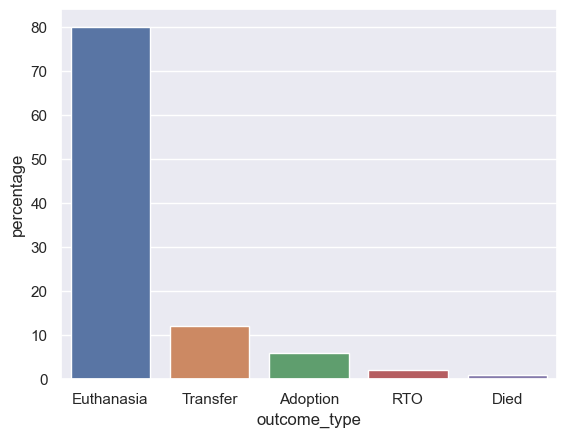

In [79]:
euth_req_outcome = shelter_outcomes.loc[shelter_outcomes.intake_type == 'Euthanasia Request']['outcome_type'].value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
euth_req_outcome['percentage'] = round(100 * euth_req_outcome.percentage)
euth_req_outcome['outcome_type'] = euth_req_outcome['outcome_type'].str.replace('Return to Owner', 'RTO')
sns.barplot(x='outcome_type', y='percentage', data = euth_req_outcome);

Y para los animales abandonados son las siguientes:

In [80]:
shelter_outcomes.loc[shelter_outcomes.intake_type == 'Abandoned'].outcome_type.value_counts(normalize=True)

Adoption           0.538462
Transfer           0.269231
Return to Owner    0.173077
Euthanasia         0.019231
Name: outcome_type, dtype: float64

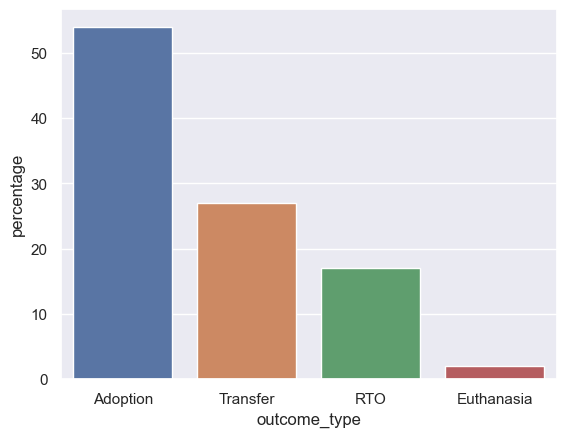

In [81]:
abandoned_outcome = shelter_outcomes.loc[shelter_outcomes.intake_type == 'Abandoned']['outcome_type'].value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
abandoned_outcome['percentage'] = round(100 * abandoned_outcome.percentage)
abandoned_outcome['outcome_type'] = abandoned_outcome['outcome_type'].str.replace('Return to Owner', 'RTO')
sns.barplot(x='outcome_type', y='percentage', data = abandoned_outcome);

__________________________________________________________________________________________________________________

**Intake condition**

Vamos a analizar los distintos estados de salud en los que llegan los animales al refugio:

In [82]:
shelter_outcomes.intake_condition.value_counts(normalize=True)

Normal      0.875723
Injured     0.068658
Sick        0.037905
Nursing     0.007767
Aged        0.005641
Other       0.001951
Pregnant    0.000791
Medical     0.000703
Feral       0.000633
Behavior    0.000228
Name: intake_condition, dtype: float64

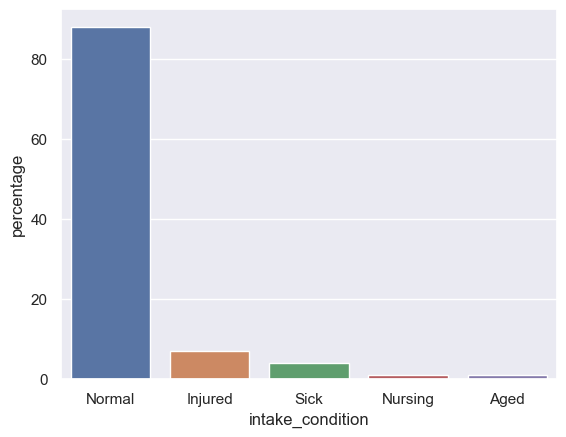

In [83]:
intake_condition = shelter_outcomes.intake_condition.value_counts(normalize=True).reset_index().rename(columns={'intake_condition':'percentage','index':'intake_condition'}).head()
intake_condition['percentage'] = round(100 * intake_condition.percentage)
sns.barplot(x='intake_condition', y='percentage', data = intake_condition);

Ahora, veamos si estas condiciones afectan las probabilidades de adopción de los animales.

Esta es la distribución de los distintos `outcome_type`s para los animales que llegan al centro sin problemas o condiciones médicas:

In [84]:
shelter_outcomes.loc[shelter_outcomes.intake_condition == 'Normal'].outcome_type.value_counts(normalize=True)

Adoption           0.516766
Return to Owner    0.257620
Transfer           0.199747
Euthanasia         0.021231
Died               0.004174
Missing            0.000462
Name: outcome_type, dtype: float64

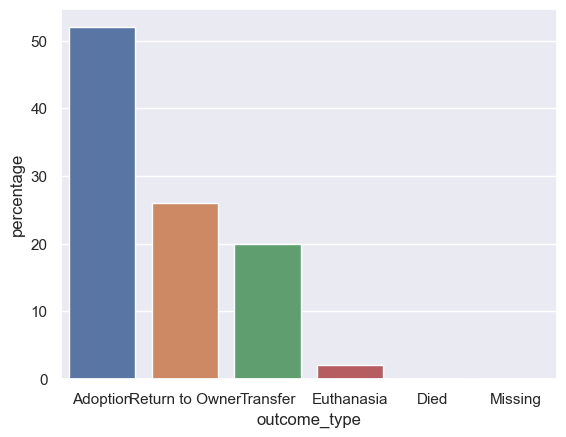

In [85]:
normal_outcomes = shelter_outcomes.loc[shelter_outcomes.intake_condition == 'Normal'].outcome_type.value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
normal_outcomes['percentage'] = round(100 * normal_outcomes.percentage)
sns.barplot(x='outcome_type', y='percentage', data = normal_outcomes);

Y para aquellos que llegan heridos:

In [86]:
shelter_outcomes.loc[shelter_outcomes.intake_condition == 'Injured'].outcome_type.value_counts(normalize=True)

Adoption           0.345790
Transfer           0.250064
Euthanasia         0.211159
Return to Owner    0.155874
Died               0.036857
Missing            0.000256
Name: outcome_type, dtype: float64

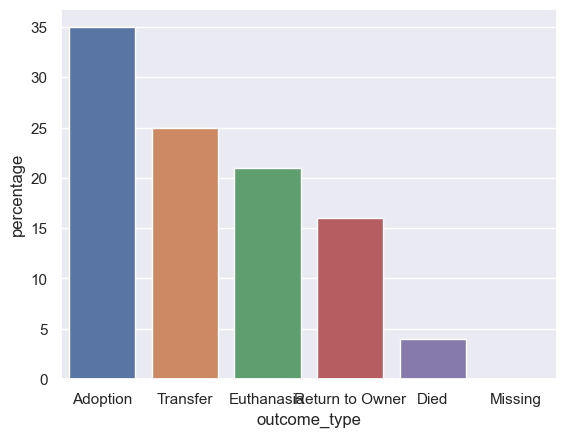

In [87]:
injured_outcomes = shelter_outcomes.loc[shelter_outcomes.intake_condition == 'Injured'].outcome_type.value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
injured_outcomes['percentage'] = round(100 * injured_outcomes.percentage)
sns.barplot(x='outcome_type', y='percentage', data = injured_outcomes);

Para los que llegan enfermos son las siguientes:

In [88]:
shelter_outcomes.loc[shelter_outcomes.intake_condition == 'Sick'].outcome_type.value_counts(normalize=True)

Transfer           0.375058
Adoption           0.249420
Euthanasia         0.224849
Return to Owner    0.097821
Died               0.051924
Missing            0.000927
Name: outcome_type, dtype: float64

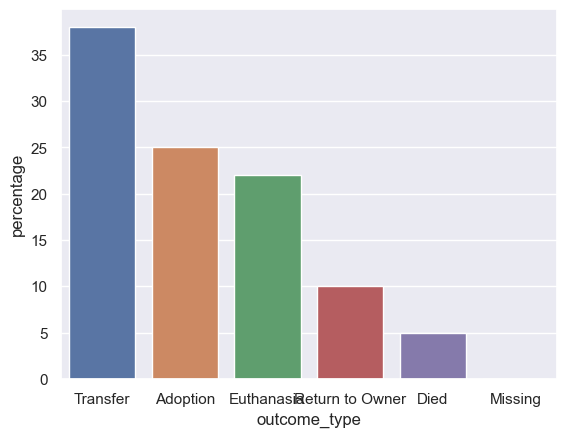

In [89]:
sick_outcomes = shelter_outcomes.loc[shelter_outcomes.intake_condition == 'Sick'].outcome_type.value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
sick_outcomes['percentage'] = round(100 * sick_outcomes.percentage)
sns.barplot(x='outcome_type', y='percentage', data = sick_outcomes);

Esta es la distribución de los distintos `outcome_type`s para los animales que llegan al centro amamantando a crías:

In [90]:
shelter_outcomes.loc[shelter_outcomes.intake_condition == 'Nursing'].outcome_type.value_counts(normalize=True)

Transfer           0.531674
Adoption           0.407240
Return to Owner    0.024887
Died               0.020362
Euthanasia         0.015837
Name: outcome_type, dtype: float64

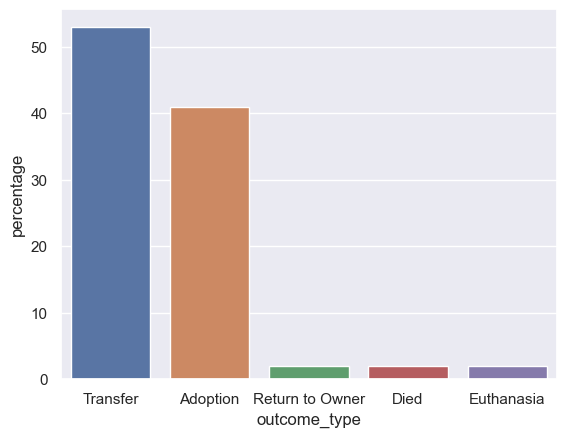

In [91]:
nursing_outcomes = shelter_outcomes.loc[shelter_outcomes.intake_condition == 'Nursing'].outcome_type.value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
nursing_outcomes['percentage'] = round(100 * nursing_outcomes.percentage)
sns.barplot(x='outcome_type', y='percentage', data = nursing_outcomes);

Y para aquellos que llegan embarazados:

In [92]:
shelter_outcomes.loc[shelter_outcomes.intake_condition == 'Pregnant'].outcome_type.value_counts(normalize=True)

Adoption           0.488889
Transfer           0.400000
Return to Owner    0.111111
Name: outcome_type, dtype: float64

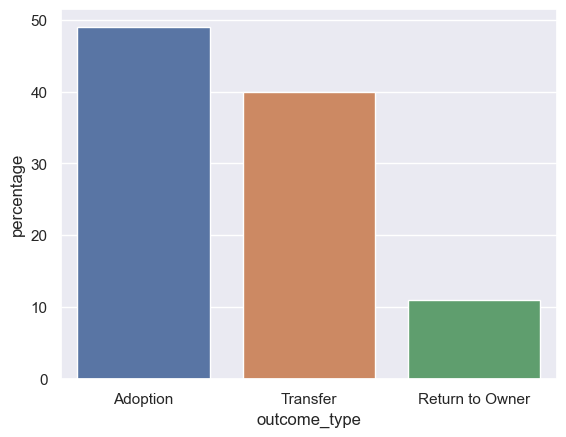

In [93]:
pregnant_outcomes = shelter_outcomes.loc[shelter_outcomes.intake_condition == 'Pregnant'].outcome_type.value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
pregnant_outcomes['percentage'] = round(100 * pregnant_outcomes.percentage)
sns.barplot(x='outcome_type', y='percentage', data = pregnant_outcomes);

Esta es la distribución de los distintos `outcome_type`s para los animales que llegan al centro con otras condiciones médicas no especificadas:

In [94]:
shelter_outcomes.loc[shelter_outcomes.intake_condition == 'Medical'].outcome_type.value_counts(normalize=True)

Adoption           0.525
Transfer           0.275
Return to Owner    0.125
Euthanasia         0.050
Died               0.025
Name: outcome_type, dtype: float64

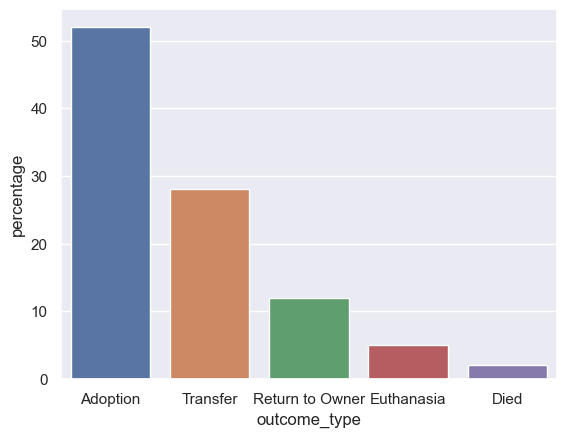

In [95]:
medical_outcomes = shelter_outcomes.loc[shelter_outcomes.intake_condition == 'Medical'].outcome_type.value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
medical_outcomes['percentage'] = round(100 * medical_outcomes.percentage)
sns.barplot(x='outcome_type', y='percentage', data = medical_outcomes);

Y para los animales asilvestrados:

In [96]:
shelter_outcomes.loc[shelter_outcomes.intake_condition == 'Feral'].outcome_type.value_counts(normalize=True)

Transfer           0.472222
Adoption           0.277778
Return to Owner    0.111111
Euthanasia         0.083333
Died               0.055556
Name: outcome_type, dtype: float64

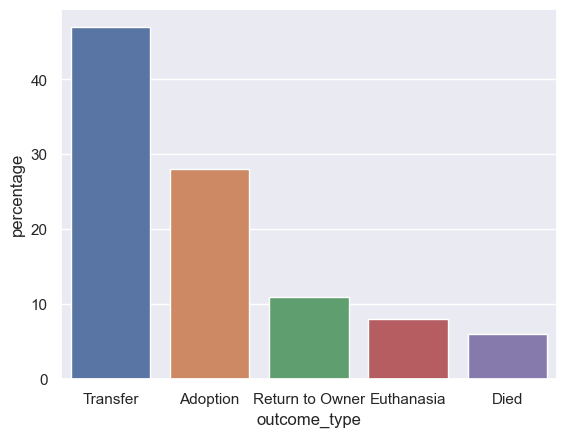

In [97]:
feral_outcomes = shelter_outcomes.loc[shelter_outcomes.intake_condition == 'Feral'].outcome_type.value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
feral_outcomes['percentage'] = round(100 * feral_outcomes.percentage)
sns.barplot(x='outcome_type', y='percentage', data = feral_outcomes);

Veamos los `outcome_type`s para aquellos animales con conductas agresivas:

In [98]:
shelter_outcomes.loc[shelter_outcomes.intake_condition == 'Behavior'].outcome_type.value_counts(normalize=True)

Adoption           0.615385
Return to Owner    0.307692
Euthanasia         0.076923
Name: outcome_type, dtype: float64

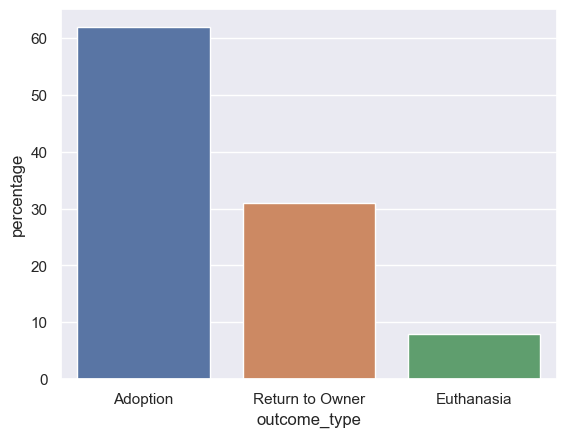

In [99]:
behavior_outcomes = shelter_outcomes.loc[shelter_outcomes.intake_condition == 'Behavior'].outcome_type.value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
behavior_outcomes['percentage'] = round(100 * behavior_outcomes.percentage)
sns.barplot(x='outcome_type', y='percentage', data = behavior_outcomes);

__________________________________________________________________________________________________________________

**Time at Shelter**

Observemos la estancia media en días de los animales en el refugio:

In [100]:
shelter_outcomes.time_at_shelter.describe()

count    56905.000000
mean        24.331570
std         82.275795
min          0.000000
25%          2.000000
50%          5.000000
75%         16.000000
max       2304.000000
Name: time_at_shelter, dtype: float64

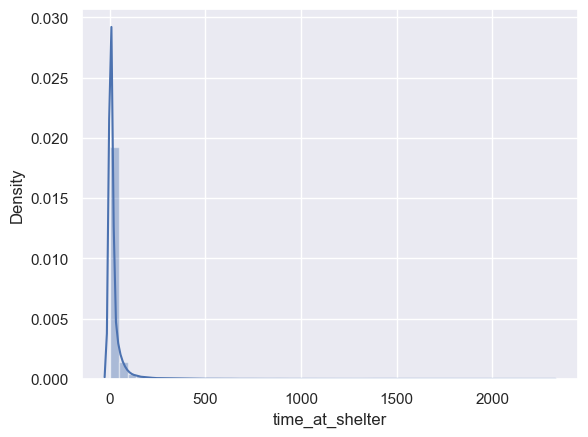

In [101]:
sns.distplot(shelter_outcomes.time_at_shelter);

__________________________________________________________________________________________________________________

#  3. Contraste de hipótesis

### 3.1. Hipótesis 1: Los gatos negros tienen menores tasas de adopción

Vamos a evaluar la siguiente hipótesis:

**$H_0$** (hipótesis nula): la tasa de adopción de los gatos negros es mayor o igual a la de los gatos de otros colores

**$H_a$** (hipótesis alternativa): los gatos negros tienen menores tasas de adopción que los gatos de otros colores

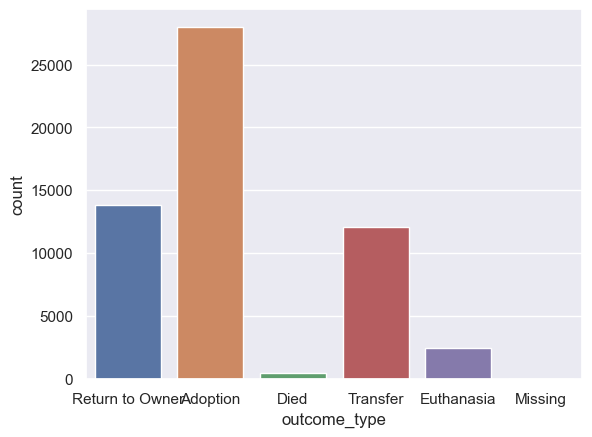

In [102]:
sns.countplot(x='outcome_type', data = shelter_outcomes);

Vamos a examinar las tasas de adopción para los gatos negros:

In [103]:
shelter_outcomes.loc[(shelter_outcomes['animal_type'] == 'Cat') & (shelter_outcomes['color_1'] == 'Black')]['outcome_type'].value_counts(normalize=True)

Adoption           0.511781
Transfer           0.286588
Return to Owner    0.099683
Euthanasia         0.079520
Died               0.021522
Missing            0.000906
Name: outcome_type, dtype: float64

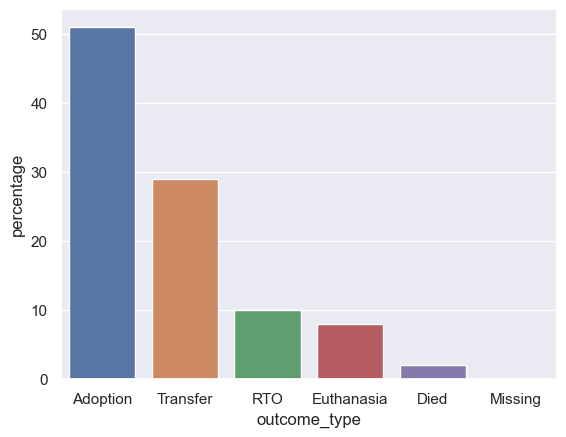

In [104]:
black_cats_outcome = shelter_outcomes.loc[(shelter_outcomes['animal_type'] == 'Cat') & (shelter_outcomes['color_1'] == 'Black')]['outcome_type'].value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
black_cats_outcome['percentage'] = round(100 * black_cats_outcome.percentage)
black_cats_outcome['outcome_type'] = black_cats_outcome['outcome_type'].str.replace('Return to Owner', 'RTO')
sns.barplot(x='outcome_type', y='percentage', data = black_cats_outcome);

Ahora, vamos a compararlas con las de los gatos de otros colores:

In [105]:
shelter_outcomes.loc[(shelter_outcomes['animal_type'] == 'Cat') & (shelter_outcomes['color_1'] != 'Black')]['outcome_type'].value_counts(normalize=True)

Adoption           0.524556
Transfer           0.292063
Return to Owner    0.098067
Euthanasia         0.066698
Died               0.018140
Missing            0.000475
Name: outcome_type, dtype: float64

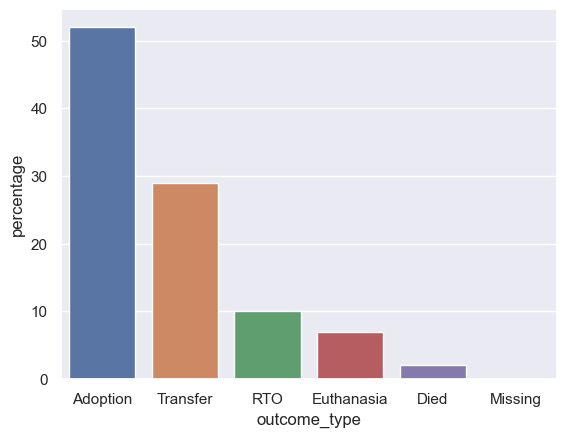

In [106]:
other_cats_outcome = shelter_outcomes.loc[(shelter_outcomes['animal_type'] == 'Cat') & (shelter_outcomes['color_1'] != 'Black')]['outcome_type'].value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
other_cats_outcome['percentage'] = round(100 * other_cats_outcome.percentage)
other_cats_outcome['outcome_type'] = other_cats_outcome['outcome_type'].str.replace('Return to Owner', 'RTO')
sns.barplot(x='outcome_type', y='percentage', data = other_cats_outcome);

Sólo comparando los datasets, parece ser que **sí** que hay una diferencia entre los porcentajes de adopción de los gatos negros (51%) y los gatos de otros colores (52%). 

Vamos a comprobar si esta diferencia es estadísticamente significativa realizando un *Z-test*.

In [107]:
black_cats = shelter_outcomes.loc[(shelter_outcomes['animal_type'] == 'Cat') & (shelter_outcomes['color_1'] == 'Black')]
other_cats = shelter_outcomes.loc[(shelter_outcomes['animal_type'] == 'Cat') & (shelter_outcomes['color_1'] != 'Black')]

n1 = len(black_cats)
k1 = len(black_cats.loc[(black_cats.outcome_type == 'Adoption')])

n2 = len(other_cats)
k2 = len(other_cats.loc[(other_cats.outcome_type == 'Adoption')])

adoptions = np.array([k1, k2])
sample = np.array([n1, n2])

proportions_ztest(count=adoptions, nobs=sample, alternative = "smaller")

(-1.462556310174579, 0.07179441275968297)

En este caso, los valores de *Z* y del *p-valor* no nos permiten descartar la hipótesis nula.

Es decir, **no** podemos concluir que las tasas de adopción de los gatos negros sean menores a las de los gatos de otros colores.

Vamos a representarlo gráficamente:

In [108]:
black_cats_adoption_rate = black_cats_outcome.loc[black_cats_outcome.outcome_type == 'Adoption']
black_cats_adoption_rate.rename(columns={'outcome_type':'color'}, inplace = True)
black_cats_adoption_rate['color'] = black_cats_adoption_rate['color'].str.replace('Adoption', 'black')

other_cats_adoption_rate = other_cats_outcome.loc[other_cats_outcome.outcome_type == 'Adoption']
other_cats_adoption_rate.rename(columns={'outcome_type':'color'}, inplace = True)
other_cats_adoption_rate['color'] = other_cats_adoption_rate['color'].str.replace('Adoption', 'other')

all_cats_adoption_rate = black_cats_adoption_rate.merge(other_cats_adoption_rate, how = 'outer')
all_cats_adoption_rate 

,color,percentage
0,black,51.0
1,other,52.0


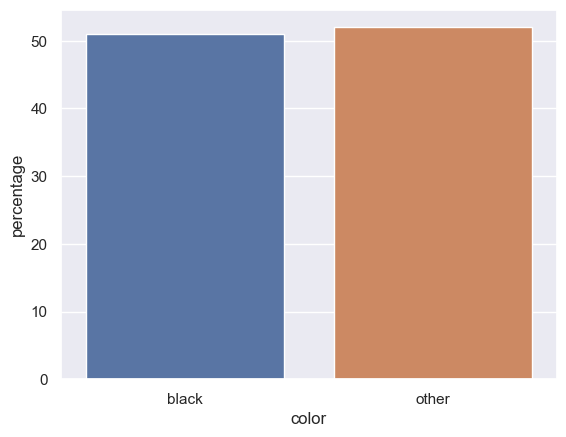

In [109]:
sns.barplot(x='color', y='percentage', data = all_cats_adoption_rate);

__________________________________________________________________________________________________________________

### 3.2. Hipótesis 2: Los animales ancianos tienen menores tasas de adopción

Evaluemos la siguiente hipótesis:

**$H_0$** (hipótesis nula): la tasa de adopción de los animales de 10 años o más es mayor o igual a la de los animales de menos de 10 años

**$H_a$** (hipótesis alternativa): la tasa de adopción de los animales de 10 años o más es menor que la de los animales de menos de 10 años

Examinemos las tasas de adopción para los animales mayores a 10 años:

In [110]:
shelter_outcomes.loc[shelter_outcomes['age_upon_outcome'] >= 10]['outcome_type'].value_counts(normalize=True)

Return to Owner    0.453142
Adoption           0.237321
Transfer           0.178060
Euthanasia         0.116042
Died               0.015436
Name: outcome_type, dtype: float64

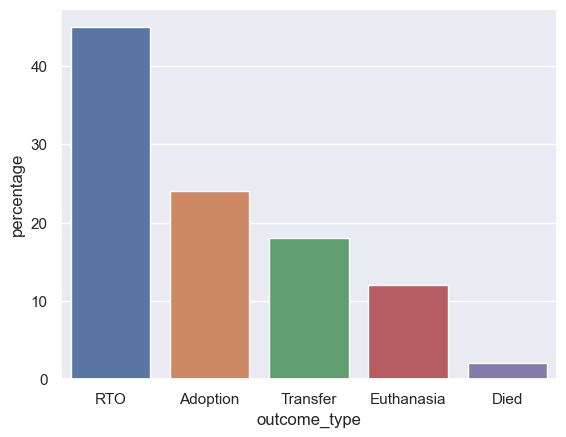

In [111]:
aged_outcome = shelter_outcomes.loc[shelter_outcomes['age_upon_outcome'] >= 10]['outcome_type'].value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
aged_outcome['percentage'] = round(100 * aged_outcome.percentage)
aged_outcome['outcome_type'] = aged_outcome['outcome_type'].str.replace('Return to Owner', 'RTO')
sns.barplot(x='outcome_type', y='percentage', data = aged_outcome);

Y para los menores:

In [112]:
shelter_outcomes.loc[shelter_outcomes['age_upon_outcome'] < 10]['outcome_type'].value_counts(normalize=True)

Adoption           0.509094
Return to Owner    0.229086
Transfer           0.215271
Euthanasia         0.038140
Died               0.007921
Missing            0.000488
Name: outcome_type, dtype: float64

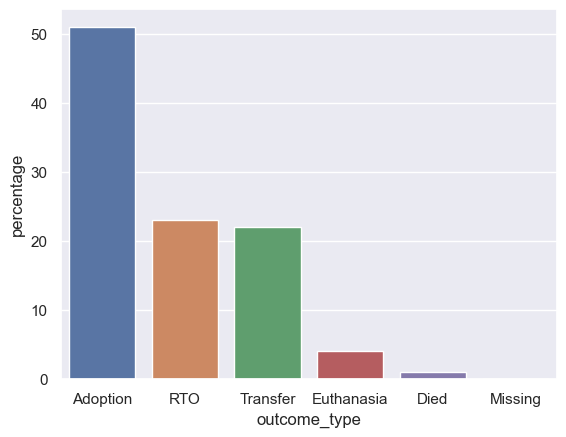

In [113]:
young_outcome = shelter_outcomes.loc[shelter_outcomes['age_upon_outcome'] < 10]['outcome_type'].value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
young_outcome['percentage'] = round(100 * young_outcome.percentage)
young_outcome['outcome_type'] = young_outcome['outcome_type'].str.replace('Return to Owner', 'RTO')
sns.barplot(x='outcome_type', y='percentage', data = young_outcome);

Podemos observar que hay una diferencia en las tasas de adopción del **26%**, ya que los animales ancianos son adoptados solo el **24%** de las veces mientras que los jóvenes son adoptados el **50%** de las veces.

Tambien es interesante notar que hay una diferencia bastante grande entre la proporción de animales ancianos que son devueltos a sus dueños (un **45%**) en comparación con los jóvenes (un **22%**).

Vamos a comprobar si la diferencia en las tasas de adopción es estadísticamente significativa mediante un *Z-test*.

In [114]:
aged_animals = shelter_outcomes.loc[shelter_outcomes['age_upon_outcome'] >= 10]
young_animals = shelter_outcomes.loc[shelter_outcomes['age_upon_outcome'] < 10]

n1 = len(aged_animals)
k1 = len(aged_animals.loc[(aged_animals.outcome_type == 'Adoption')])

n2 = len(young_animals)
k2 = len(young_animals.loc[(young_animals.outcome_type == 'Adoption')])

adoptions = np.array([k1, k2])
sample = np.array([n1, n2])

proportions_ztest(count=adoptions, nobs=sample, alternative = "smaller")

(-31.682812084921405, 1.3400716037102446e-220)

Para tener un nivel de confianza del 99.9% en un test unilateral, el estadístico debe ser superior a 3.08 y el *p-valor* inferior a 0.001. En este caso el estadístico es muy superior, por lo que podemos descartar la hipótesis nula y aceptar la alternativa.

Por lo tanto, podemos concluir que los animales ancianos tienen un **26%** menos de probabilidades de ser adoptados.

Vamos a representarlo gráficamente:

In [115]:
aged_animals_adoption_rate = aged_outcome.loc[aged_outcome.outcome_type == 'Adoption']
aged_animals_adoption_rate.rename(columns={'outcome_type':'age'}, inplace = True)
aged_animals_adoption_rate['age'] = aged_animals_adoption_rate['age'].str.replace('Adoption', 'aged')

young_animals_adoption_rate = young_outcome.loc[young_outcome.outcome_type == 'Adoption']
young_animals_adoption_rate.rename(columns={'outcome_type':'age'}, inplace = True)
young_animals_adoption_rate['age'] = young_animals_adoption_rate['age'].str.replace('Adoption', 'young')

all_animals_adoption_rate = aged_animals_adoption_rate.merge(young_animals_adoption_rate, how = 'outer')
all_animals_adoption_rate 

,age,percentage
0,aged,24.0
1,young,51.0


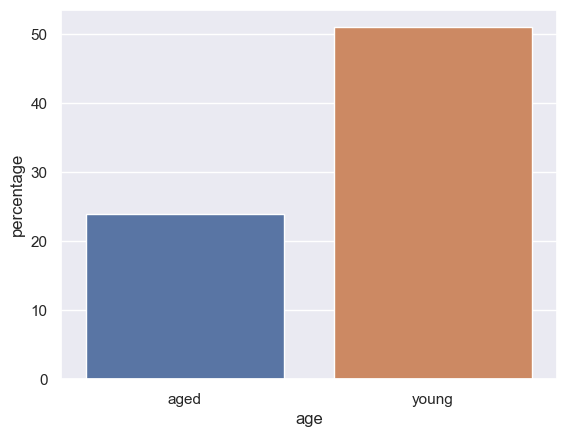

In [116]:
sns.barplot(x='age', y='percentage', data = all_animals_adoption_rate);

__________________________________________________________________________________________________________________

### 3.3. Hipótesis 3: Los animales de raza tienen mayores tasas de adopción

A continuación, vamos a comprobar la siguiente hipótesis:

**$H_0$** (hipótesis nula): la tasa de adopción de los animales de raza es menor o igual a la de los animales mestizos

**$H_a$** (hipótesis alternativa): la tasa de adopción de los animales de raza es mayor a la de los animales mestizos

Vamos a analizar las tasas de adopción de los animales de raza:

In [117]:
shelter_outcomes.loc[shelter_outcomes['purebred'] == True]['outcome_type'].value_counts(normalize=True)

Adoption           0.395809
Return to Owner    0.350767
Transfer           0.219106
Euthanasia         0.026563
Died               0.007260
Missing            0.000495
Name: outcome_type, dtype: float64

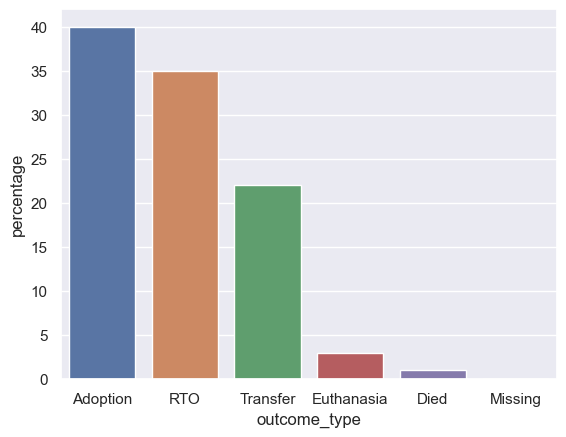

In [118]:
purebred_outcome = shelter_outcomes.loc[shelter_outcomes['purebred'] == True]['outcome_type'].value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
purebred_outcome['percentage'] = round(100 * purebred_outcome.percentage)
purebred_outcome['outcome_type'] = purebred_outcome['outcome_type'].str.replace('Return to Owner', 'RTO')
sns.barplot(x='outcome_type', y='percentage', data = purebred_outcome);

Y las de los perros mestizos:

In [119]:
shelter_outcomes.loc[shelter_outcomes['purebred'] == False]['outcome_type'].value_counts(normalize=True)

Adoption           0.503206
Return to Owner    0.230568
Transfer           0.212159
Euthanasia         0.045079
Died               0.008536
Missing            0.000452
Name: outcome_type, dtype: float64

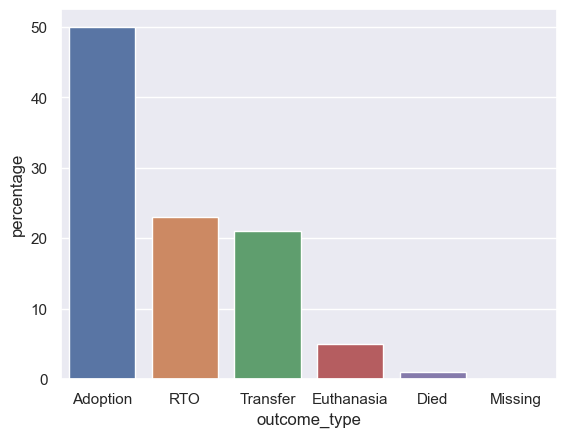

In [120]:
mix_outcome = shelter_outcomes.loc[shelter_outcomes['purebred'] != True]['outcome_type'].value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
mix_outcome['percentage'] = round(100 * mix_outcome.percentage)
mix_outcome['outcome_type'] = mix_outcome['outcome_type'].str.replace('Return to Owner', 'RTO')
sns.barplot(x='outcome_type', y='percentage', data = mix_outcome);

Podemos ver que, de hecho, los animales de raza tienen unas tasas de adopción **menores** (de un **39%**) a las de los animales mestizos (que tienen un **49%**). Sin embargo, un porcentaje mayor regresan con su antiguo dueño (**35%** comparado con **35%**). 

Por lo tanto, no podemos descartar la hipótesis nula.

__________________________________________________________________________________________________________________

### 3.4. Hipótesis 4: Los pitbulls tienen menores tasas de adopción

Por último, evaluemos la siguiente hipótesis:

**$H_0$** (hipótesis nula): la tasa de adopción de los pitbulls es mayor o igual a la de los perros de otras razas

**$H_a$** (hipótesis alternativa): los pitbulls tienen menores tasas de adopción que los perros de otras razas

Para este estudio, vamos a incluir dentro de la definición de pitbull cualquier perro que tenga 'Pit Bull' como raza principal o secundaria.

Examinemos las tasas de adopción para los pitbulls:

In [121]:
shelter_outcomes.loc[(shelter_outcomes['animal_type'] == 'Dog') 
                     & ((shelter_outcomes['breed_1'] == 'Pit Bull')
                     | (shelter_outcomes['breed_1'] == 'Pit Bull'))]['outcome_type'].value_counts(normalize=True)

Adoption           0.411610
Return to Owner    0.341318
Transfer           0.178353
Euthanasia         0.063473
Died               0.003672
Missing            0.001574
Name: outcome_type, dtype: float64

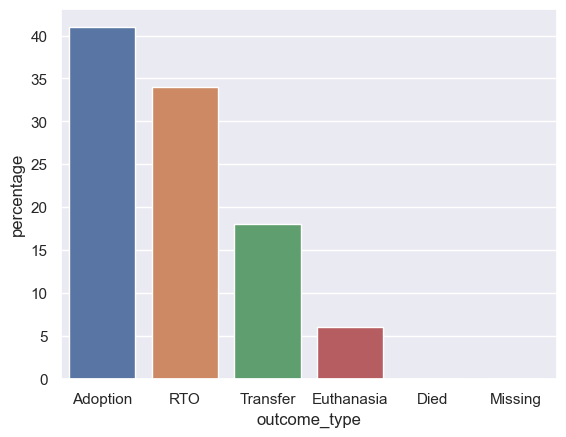

In [122]:
pitbull_outcome = shelter_outcomes.loc[(shelter_outcomes['animal_type'] == 'Dog') 
                     & ((shelter_outcomes['breed_1'] == 'Pit Bull')
                     | (shelter_outcomes['breed_1'] == 'Pit Bull'))]['outcome_type'].value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
pitbull_outcome['percentage'] = round(100 * pitbull_outcome.percentage)
pitbull_outcome['outcome_type'] = pitbull_outcome['outcome_type'].str.replace('Return to Owner', 'RTO')
sns.barplot(x='outcome_type', y='percentage', data = pitbull_outcome);

Y la de los perros de otras razas:

In [123]:
shelter_outcomes.loc[(shelter_outcomes['animal_type'] == 'Dog') 
                     & (shelter_outcomes['breed_1'] != 'Pit Bull')
                     & (shelter_outcomes['breed_1'] != 'Pit Bull')]['outcome_type'].value_counts(normalize=True)

Adoption           0.490483
Return to Owner    0.299256
Transfer           0.179893
Euthanasia         0.026268
Died               0.003895
Missing            0.000205
Name: outcome_type, dtype: float64

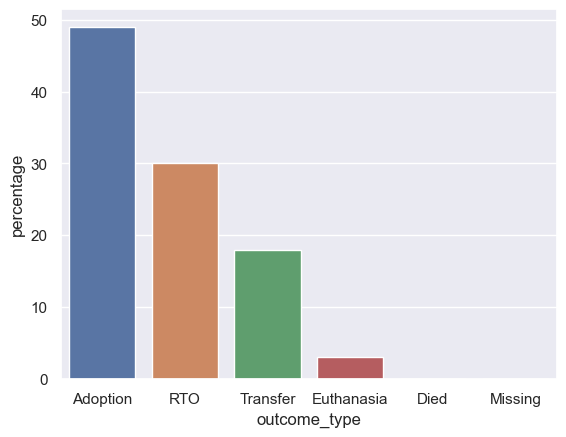

In [124]:
other_dogs_outcome = shelter_outcomes.loc[(shelter_outcomes['animal_type'] == 'Dog') 
                     & (shelter_outcomes['breed_1'] != 'Pit Bull')
                     & (shelter_outcomes['breed_1'] != 'Pit Bull')]['outcome_type'].value_counts(normalize=True).reset_index().rename(columns={'outcome_type':'percentage','index':'outcome_type'})
other_dogs_outcome['percentage'] = round(100 * other_dogs_outcome.percentage)
other_dogs_outcome['outcome_type'] = other_dogs_outcome['outcome_type'].str.replace('Return to Owner', 'RTO')
sns.barplot(x='outcome_type', y='percentage', data = other_dogs_outcome);

Podemos ver que en nuestra muestra, los pitbulls tienen un **8%** menos de posibilidades de ser adoptados. Vamos a ver si esta diferencia es estadísticamente significativa:

In [125]:
pitbulls = shelter_outcomes.loc[(shelter_outcomes['animal_type'] == 'Dog') & ((shelter_outcomes['breed_1'] == 'Pit Bull') | (shelter_outcomes['breed_1'] == 'Pit Bull'))]
other_dogs = shelter_outcomes.loc[(shelter_outcomes['animal_type'] == 'Dog') & (shelter_outcomes['breed_1'] != 'Pit Bull') & (shelter_outcomes['breed_1'] != 'Pit Bull')]

n1 = len(pitbulls)
k1 = len(pitbulls.loc[(pitbulls.outcome_type == 'Adoption')])

n2 = len(other_dogs)
k2 = len(other_dogs.loc[(other_dogs.outcome_type == 'Adoption')])

adoptions = np.array([k1, k2])
sample = np.array([n1, n2])

proportions_ztest(count=adoptions, nobs=sample, alternative = "smaller")

(-11.050120909096755, 1.0945991880038892e-28)

Para tener un nivel de confianza del 99.9% en un test unilateral, el estadístico debe ser superior a 3.08 y el *p-valor* inferior a 0.001. En este caso el estadístico es bastante superior, por lo que podemos descartar la hipótesis nula y aceptar la alternativa.

En otras palabras, podemos afirmar que los pitbulls tienen una menor probabilidad de ser adoptados.

Vamos a representarlo gráficamente:

In [126]:
pitbull_adoption_rate = pitbull_outcome.loc[pitbull_outcome.outcome_type == 'Adoption']
pitbull_adoption_rate.rename(columns={'outcome_type':'breed'}, inplace = True)
pitbull_adoption_rate['breed'] = pitbull_adoption_rate['breed'].str.replace('Adoption', 'pitbull')

other_dogs_adoption_rate = other_dogs_outcome.loc[other_dogs_outcome.outcome_type == 'Adoption']
other_dogs_adoption_rate.rename(columns={'outcome_type':'breed'}, inplace = True)
other_dogs_adoption_rate['breed'] = other_dogs_adoption_rate['breed'].str.replace('Adoption', 'other')

all_dogs_adoption_rate = pitbull_adoption_rate.merge(other_dogs_adoption_rate, how = 'outer')
all_dogs_adoption_rate 

,breed,percentage
0,pitbull,41.0
1,other,49.0


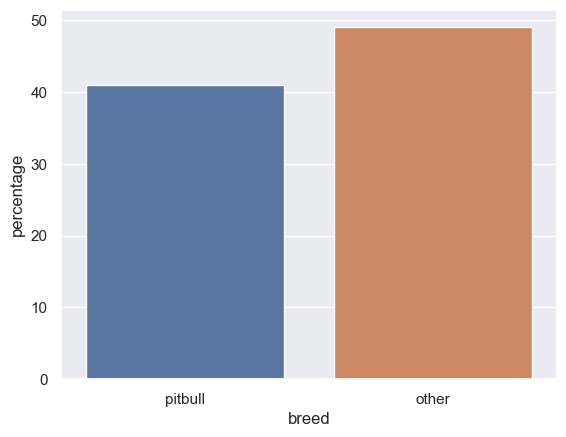

In [127]:
sns.barplot(x='breed', y='percentage', data = all_dogs_adoption_rate);

__________________________________________________________________________________________________________________

Con esto concluye el análisis de los datos. En el [siguiente cuaderno](./V.%20Conclusion.ipynb), resumiremos los hallazgos realizados durante el exploratorio.

__________________________________________________________________________________________________________________